In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Introduction and Project Setup

In [ ]:
pip install matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 3.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 4.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 4.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 4.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10/10 [seaborn]9/10 [seaborn]ib]
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 3.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.7/792.7 kB 3.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [nltk]4/5 [nltk]]]
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
from IPython.display import Markdown, display
from pathlib import Path

# Configure visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.2)

print("Hybrid Information Retrieval Strategies for RAG Models")
print("Using the LLeQA French Legal Dataset")

Hybrid Information Retrieval Strategies for RAG Models
Using the LLeQA French Legal Dataset


## 2. Data Loading and Exploration


### 2.1 Load the LLeQA dataset from local files

In [4]:
def load_lleqa_dataset(data_dir="/content/drive/MyDrive/legal-rag-assistant/Notebooks/data/lleqa"):
    """Load the LLeQA dataset from JSON files."""
    questions_train = json.load(open(os.path.join(data_dir, "questions_train.json")))
    questions_dev = json.load(open(os.path.join(data_dir, "questions_dev.json")))
    questions_test = json.load(open(os.path.join(data_dir, "questions_test.json")))
    articles = json.load(open(os.path.join(data_dir, "articles.json")))

    print(f"Loaded {len(questions_train)} training questions")
    print(f"Loaded {len(questions_dev)} dev questions")
    print(f"Loaded {len(questions_test)} test questions")
    print(f"Loaded {len(articles)} legal articles")

    return {
        "train": questions_train,
        "dev": questions_dev,
        "test": questions_test,
        "articles": articles
    }

# Load dataset
data = load_lleqa_dataset()

Loaded 1472 training questions
Loaded 201 dev questions
Loaded 195 test questions
Loaded 27942 legal articles


### 2.2 Data Exploration

### Sample Question

**Question:** Quel est le montant des allocations familiales "de base" à Bruxelles ?

**Regions:** Région de Bruxelles-Capitale

**Topics:** Protection sociale, Allocations familiales et de naissance, Allocations familiales à Bruxelles, Montant et suppléments des allocations familiales (Bruxelles)

**Article IDs:** [27938, 27908, 27916]

**Paragraph IDs:** ['27938§1', '27908§1', '27916§1']

**Answer:** Avant d’aller plus loin Attention, vous avez droit à ces nouveaux montants uniquement s’ils sont plus avantageux que votre ancien montant (celui que vous receviez en décembre 2019). Pour plus d’informations, voyez la fiche « Mon enfant né avant le 1erjanvier 2020, a-t-il droit au nouveau système...

### Referenced Article

**Reference:** Art. 35, Ordonnance du 25 avril 2019 réglant l'octroi des prestations familiales (Chapitre 13)

**Authority:** federale

**Description:** Dispositions relatives au paiement des montants de base et dispositions transitoires et abrogatoires

**Content:** Pour les enfants nés avant la date d'entrée en vigueur de la présente ordonnance, à l'égard de la période comprise entre cette date d'entrée en vigueur et le 31 décembre 2025, les montants de 150, 160 et 170 euros prévus à l'article 7, sont diminués, chacun, de 10 euros....

### Dataset Statistics

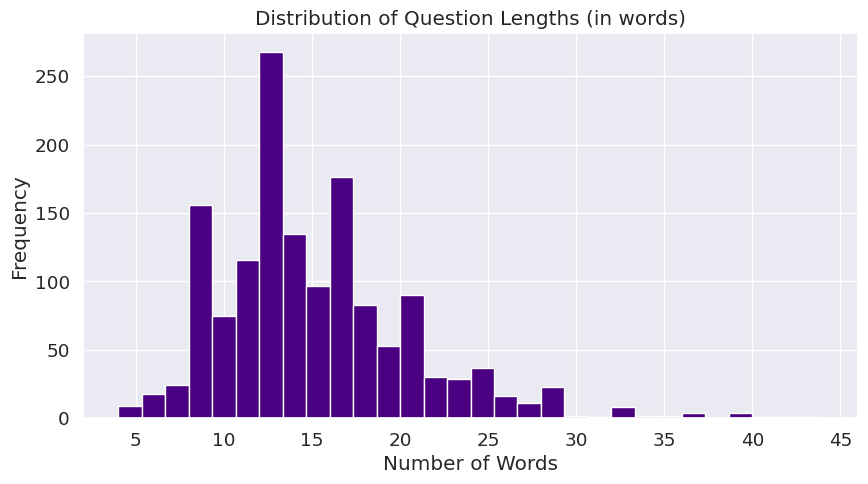

Saved plot: /content/drive/MyDrive/legal-rag-assistant/Notebooks/data_explore/question_length_distribution.png


<ipython-input-10-5c7bdfdb2f45>:51: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


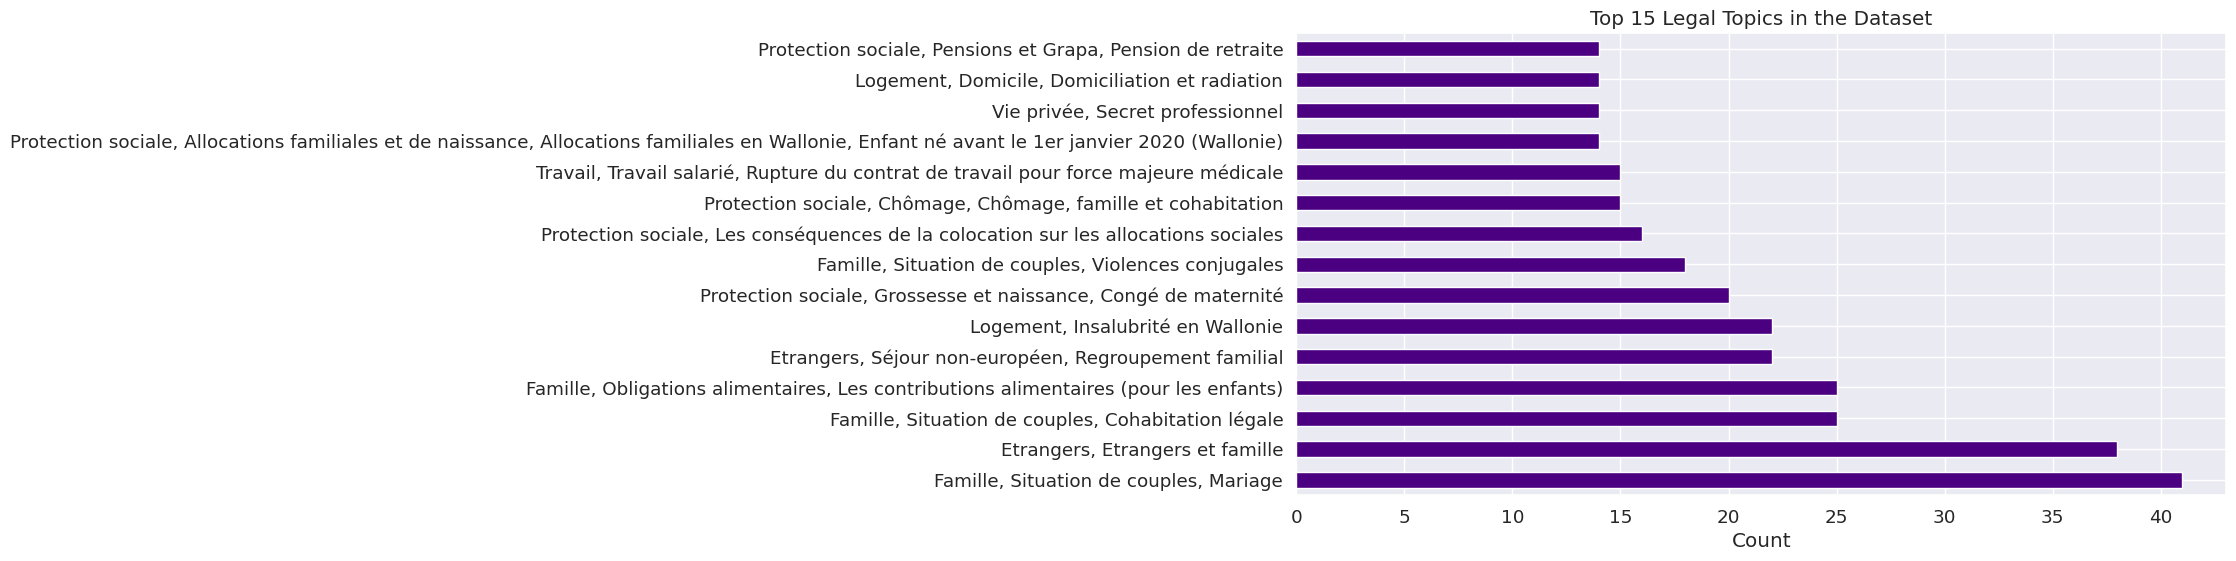

Saved plot: /content/drive/MyDrive/legal-rag-assistant/Notebooks/data_explore/top_15_legal_topics.png


In [10]:
def explore_dataset(data):
    """Explore the dataset structure and content."""
    import os

    # Define output directory
    output_dir = "/content/drive/MyDrive/legal-rag-assistant/Notebooks/data_explore"
    os.makedirs(output_dir, exist_ok=True)

    # Sample question analysis
    sample_question = data["train"][1]
    display(Markdown("### Sample Question"))
    display(Markdown(f"**Question:** {sample_question['question']}"))
    display(Markdown(f"**Regions:** {', '.join(sample_question['regions'])}"))
    display(Markdown(f"**Topics:** {', '.join(sample_question['topics'])}"))
    display(Markdown(f"**Article IDs:** {sample_question['article_ids']}"))
    display(Markdown(f"**Paragraph IDs:** {sample_question['paragraph_ids']}"))
    display(Markdown(f"**Answer:** {sample_question['answer'][:300]}..."))

    # Sample article analysis
    sample_article_id = sample_question['article_ids'][0]
    sample_article = next((a for a in data["articles"] if a["id"] == sample_article_id), None)
    if sample_article:
        display(Markdown("### Referenced Article"))
        display(Markdown(f"**Reference:** {sample_article['reference']}"))
        display(Markdown(f"**Authority:** {sample_article['authority']}"))
        display(Markdown(f"**Description:** {sample_article['description']}"))
        display(Markdown(f"**Content:** {sample_article['article'][:300]}..."))

    # Dataset statistics
    display(Markdown("### Dataset Statistics"))

    # Question length distribution
    question_lengths = [len(q["question"].split()) for q in data["train"]]
    plt.figure(figsize=(10, 5))
    plt.hist(question_lengths, bins=30, color="#4B0082")
    plt.title("Distribution of Question Lengths (in words)")
    plt.xlabel("Number of Words")
    plt.ylabel("Frequency")
    plot1_path = os.path.join(output_dir, "question_length_distribution.png")
    plt.savefig(plot1_path, dpi=300)
    plt.show()
    print(f"Saved plot: {plot1_path}")

    # Topic analysis
    all_topics = [topic for q in data["train"] for topic in q["topics"]]
    topic_counts = pd.Series(all_topics).value_counts().head(15)
    plt.figure(figsize=(12, 6))
    topic_counts.plot(kind='barh', color="#4B0082")
    plt.title("Top 15 Legal Topics in the Dataset")
    plt.xlabel("Count")
    plt.tight_layout()
    plot2_path = os.path.join(output_dir, "top_15_legal_topics.png")
    plt.savefig(plot2_path, dpi=300)
    plt.show()
    print(f"Saved plot: {plot2_path}")

# Explore the dataset
explore_dataset(data)

#### Analyze the coverage of paragraph IDs in the dataset.

,Statistic,Train,Dev,Test
0,Total questions,1472,201,195
1,No article IDs,0 (0.00%),0 (0.00%),0 (0.00%)
2,No paragraph IDs,209 (14.20%),2 (1.00%),0 (0.00%)
3,Has article but no paragraph IDs,209 (14.20%),2 (1.00%),0 (0.00%)
4,Has both article and paragraph IDs,1263 (85.80%),199 (99.00%),195 (100.00%)


<Figure size 1400x700 with 0 Axes>

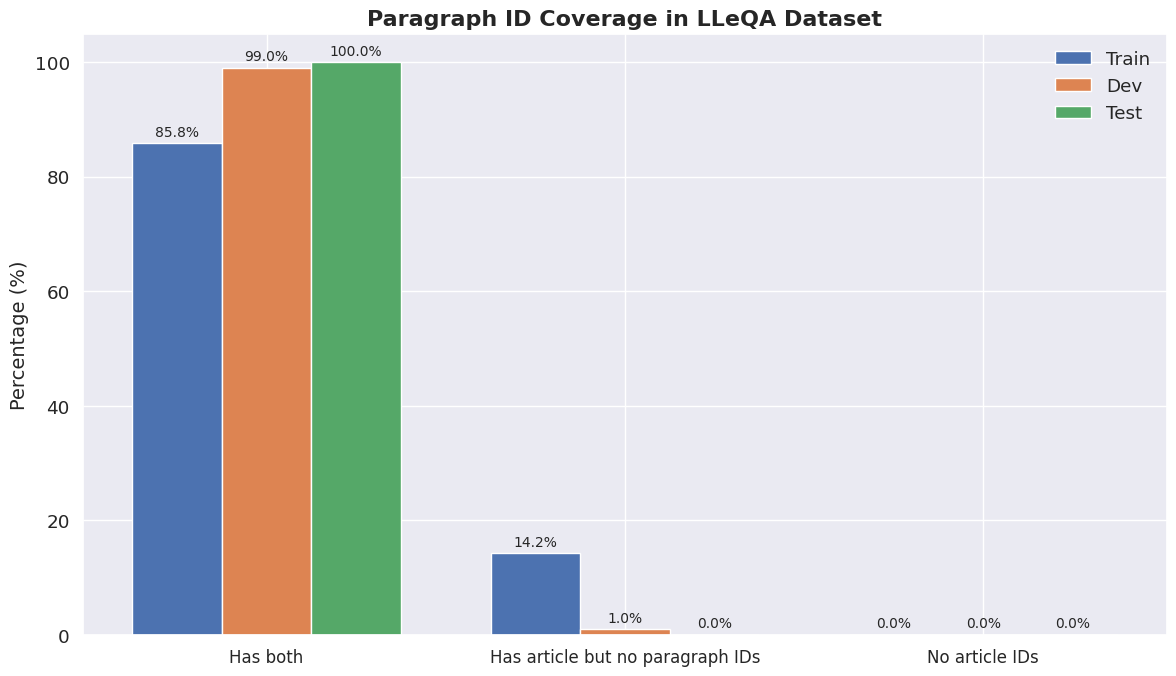

In [11]:
def analyze_paragraph_coverage(data_split):
    """
    Analyze the coverage of paragraph IDs in the dataset.

    Args:
        data_split: The dataset split to analyze ("train", "dev", or "test")

    Returns:
        Dictionary with statistics about paragraph ID coverage
    """
    questions = data[data_split]
    total_questions = len(questions)

    # Count questions with different patterns of IDs
    no_article_ids = 0
    no_paragraph_ids = 0
    has_article_no_paragraph = 0
    has_both = 0

    for question in questions:
        has_article = question["article_ids"] and len(question["article_ids"]) > 0
        has_paragraph = question["paragraph_ids"] and len(question["paragraph_ids"]) > 0

        if not has_article:
            no_article_ids += 1
        if not has_paragraph:
            no_paragraph_ids += 1
        if has_article and not has_paragraph:
            has_article_no_paragraph += 1
        if has_article and has_paragraph:
            has_both += 1

    # Calculate statistics
    stats = {
        "total_questions": total_questions,
        "no_article_ids": no_article_ids,
        "no_article_ids_pct": (no_article_ids / total_questions) * 100,
        "no_paragraph_ids": no_paragraph_ids,
        "no_paragraph_ids_pct": (no_paragraph_ids / total_questions) * 100,
        "has_article_no_paragraph": has_article_no_paragraph,
        "has_article_no_paragraph_pct": (has_article_no_paragraph / total_questions) * 100,
        "has_both": has_both,
        "has_both_pct": (has_both / total_questions) * 100
    }

    return stats

# Analyze all data splits
train_stats = analyze_paragraph_coverage("train")
dev_stats = analyze_paragraph_coverage("dev")
test_stats = analyze_paragraph_coverage("test")

# Display the results in a formatted table
coverage_df = pd.DataFrame({
    "Statistic": [
        "Total questions",
        "No article IDs",
        "No paragraph IDs",
        "Has article but no paragraph IDs",
        "Has both article and paragraph IDs"
    ],
    "Train": [
        train_stats["total_questions"],
        f"{train_stats['no_article_ids']} ({train_stats['no_article_ids_pct']:.2f}%)",
        f"{train_stats['no_paragraph_ids']} ({train_stats['no_paragraph_ids_pct']:.2f}%)",
        f"{train_stats['has_article_no_paragraph']} ({train_stats['has_article_no_paragraph_pct']:.2f}%)",
        f"{train_stats['has_both']} ({train_stats['has_both_pct']:.2f}%)"
    ],
    "Dev": [
        dev_stats["total_questions"],
        f"{dev_stats['no_article_ids']} ({dev_stats['no_article_ids_pct']:.2f}%)",
        f"{dev_stats['no_paragraph_ids']} ({dev_stats['no_paragraph_ids_pct']:.2f}%)",
        f"{dev_stats['has_article_no_paragraph']} ({dev_stats['has_article_no_paragraph_pct']:.2f}%)",
        f"{dev_stats['has_both']} ({dev_stats['has_both_pct']:.2f}%)"
    ],
    "Test": [
        test_stats["total_questions"],
        f"{test_stats['no_article_ids']} ({test_stats['no_article_ids_pct']:.2f}%)",
        f"{test_stats['no_paragraph_ids']} ({test_stats['no_paragraph_ids_pct']:.2f}%)",
        f"{test_stats['has_article_no_paragraph']} ({test_stats['has_article_no_paragraph_pct']:.2f}%)",
        f"{test_stats['has_both']} ({test_stats['has_both_pct']:.2f}%)"
    ]
})

# Display the table
display(coverage_df)

# Create a visualization of paragraph coverage
plt.figure(figsize=(14, 7))
labels = ["Has both", "Has article but no paragraph IDs", "No article IDs"]
train_values = [train_stats["has_both_pct"], train_stats["has_article_no_paragraph_pct"], train_stats["no_article_ids_pct"]]
dev_values = [dev_stats["has_both_pct"], dev_stats["has_article_no_paragraph_pct"], dev_stats["no_article_ids_pct"]]
test_values = [test_stats["has_both_pct"], test_stats["has_article_no_paragraph_pct"], test_stats["no_article_ids_pct"]]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(x - width, train_values, width, label='Train')
rects2 = ax.bar(x, dev_values, width, label='Dev')
rects3 = ax.bar(x + width, test_values, width, label='Test')

ax.set_ylabel('Percentage (%)', fontsize=14)
ax.set_title('Paragraph ID Coverage in LLeQA Dataset', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.legend()

# Add text labels
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%',
                   xy=(rect.get_x() + rect.get_width() / 2, height),
                   xytext=(0, 3),  # 3 points vertical offset
                   textcoords="offset points",
                   ha='center', va='bottom', fontsize=10)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()

### 2.3 Build Corpus for Retrieval


In [6]:
def build_corpus(articles):
    """Prepare corpus for retrieval experiments."""
    corpus = []
    article_ids = []

    # Article-level corpus
    for article in articles:
        article_ids.append(article['id'])
        corpus.append(article['article'])

    # Create lookup dictionaries
    article_lookup = {article['id']: article for article in articles}
    corpus_lookup = {article_id: text for article_id, text in zip(article_ids, corpus)}

    return {
        "corpus": corpus,
        "article_ids": article_ids,
        "article_lookup": article_lookup,
        "corpus_lookup": corpus_lookup
    }

# Build the corpus
corpus_data = build_corpus(data["articles"])
print(f"Built corpus with {len(corpus_data['corpus'])} documents")

Built corpus with 27942 documents


### 2.4 Distribution of Number of Relevant Articles per Question

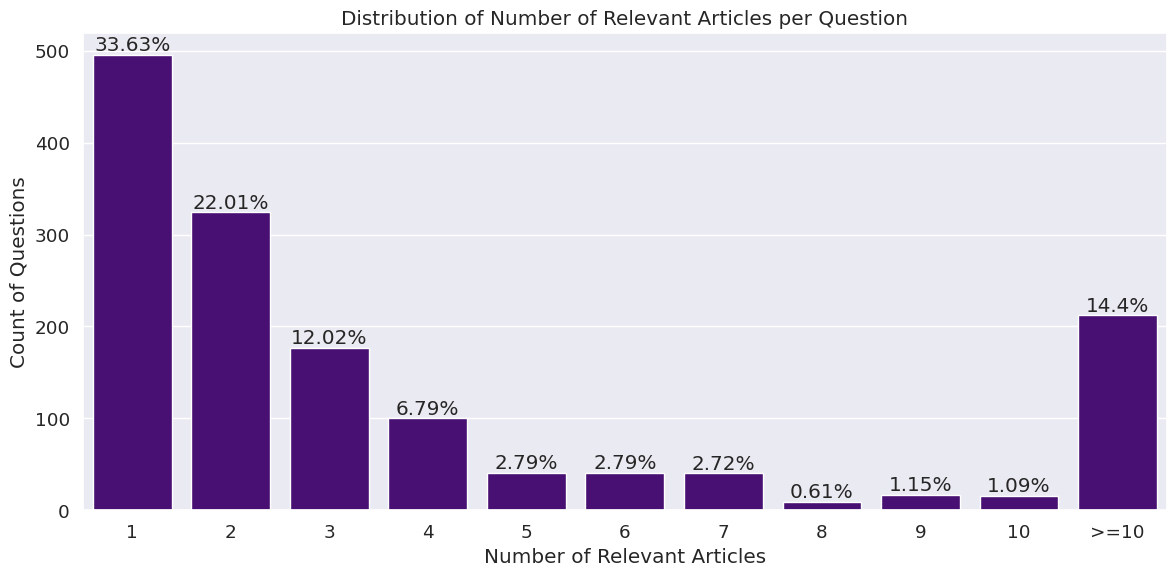

Plot saved to /content/drive/MyDrive/legal-rag-assistant/Notebooks/data_explore/relevant_articles_distribution.png


In [9]:
# Group questions with many relevant articles for better visualization
def group_high_counts(series, threshold=10):
    result = series.copy()
    high_counts = result[result.index > threshold].sum()
    result = result[result.index <= threshold]
    if high_counts > 0:
        result[f">={threshold}"] = high_counts
    return result

# Count the number of relevant articles per question in the training set
from collections import Counter
counter = Counter(len(q["article_ids"]) for q in data["train"])

# Apply grouping to make visualization more understandable
grouped_counts = group_high_counts(pd.Series(counter), threshold=10)
# Sort by numeric order, converting index to string to handle '>=10'
grouped_counts = grouped_counts.sort_index(key=lambda x: x.astype(str).map(lambda v: int(v) if v.isdigit() else float('inf')))
grouped_percentages = (grouped_counts / len(data["train"]) * 100).round(2)


# Plot simplified distribution
plt.figure(figsize=(12, 6))

# Set dark purple color
ax = sns.barplot(
    x=grouped_counts.index.astype(str),
    y=grouped_counts.values,
    order=grouped_counts.index.astype(str),
    color="#4B0082"  # dark purple hex code
)

plt.title("Distribution of Number of Relevant Articles per Question")
plt.xlabel("Number of Relevant Articles")
plt.ylabel("Count of Questions")

# Add percentage labels
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 5,
        f'{grouped_percentages.values[i]}%',
        ha="center"
    )

plt.tight_layout()

# Define save path
import os
output_dir = "/content/drive/MyDrive/legal-rag-assistant/Notebooks/data_explore"
os.makedirs(output_dir, exist_ok=True)
plot_path = os.path.join(output_dir, "relevant_articles_distribution.png")

# Save the plot
plt.savefig(plot_path, dpi=300)
plt.show()
print(f"Plot saved to {plot_path}")


### 2.5 Analyze Document Lengths

In [12]:
def analyze_document_lengths(articles):
    """Analyze the length distribution of documents in the corpus."""
    # Calculate character lengths
    char_lengths = [len(article['article']) for article in articles]

    # Calculate statistics
    avg_length = np.mean(char_lengths)
    median_length = np.median(char_lengths)
    min_length = min(char_lengths)
    max_length = max(char_lengths)
    p90_length = np.percentile(char_lengths, 90)

    # Display statistics
    display(Markdown("## Document Length Analysis"))
    display(Markdown(f"- **Average Length**: {avg_length:.2f} characters"))
    display(Markdown(f"- **Median Length**: {median_length:.2f} characters"))
    display(Markdown(f"- **Min Length**: {min_length} characters"))
    display(Markdown(f"- **Max Length**: {max_length} characters"))
    display(Markdown(f"- **90th Percentile**: {p90_length:.2f} characters"))


    # Plot paragraph lengths if available
    paragraph_lengths = []
    for article in articles:
        if 'paragraphs' in article and article['paragraphs']:
            for para_id, para_text in article['paragraphs'].items():
                paragraph_lengths.append(len(para_text))

    if paragraph_lengths:
        para_avg = np.mean(paragraph_lengths)
        para_median = np.median(paragraph_lengths)
        para_max = max(paragraph_lengths)

        display(Markdown("## Paragraph Length Analysis"))
        display(Markdown(f"- **Average Paragraph Length**: {para_avg:.2f} characters"))
        display(Markdown(f"- **Median Paragraph Length**: {para_median:.2f} characters"))
        display(Markdown(f"- **Max Paragraph Length**: {para_max} characters"))

    display(Markdown("## Percentage of documents exceeding limit characters"))
    # Check for common LLM context limits
    context_limits = [2048, 4096, 8192, 16384, 32768]
    for limit in context_limits:
        pct_over = (np.sum(np.array(char_lengths) > limit) / len(char_lengths)) * 100
        display(Markdown(f"- **Percentage of documents exceeding {limit} characters**: {pct_over:.2f}%"))

    # Return length data for further analysis
    return {
        "char_lengths": char_lengths,
        "paragraph_lengths": paragraph_lengths if paragraph_lengths else None,
        "statistics": {
            "avg_length": avg_length,
            "median_length": median_length,
            "min_length": min_length,
            "max_length": max_length,
            "p90_length": p90_length
        }
    }

# Analyze document lengths
length_analysis = analyze_document_lengths(data["articles"])


## Document Length Analysis

- **Average Length**: 1008.74 characters

- **Median Length**: 542.00 characters

- **Min Length**: 1 characters

- **Max Length**: 128904 characters

- **90th Percentile**: 2225.90 characters

## Paragraph Length Analysis

- **Average Paragraph Length**: 640.45 characters

- **Median Paragraph Length**: 417.00 characters

- **Max Paragraph Length**: 82286 characters

## Percentage of documents exceeding limit characters

- **Percentage of documents exceeding 2048 characters**: 11.40%

- **Percentage of documents exceeding 4096 characters**: 3.48%

- **Percentage of documents exceeding 8192 characters**: 0.63%

- **Percentage of documents exceeding 16384 characters**: 0.12%

- **Percentage of documents exceeding 32768 characters**: 0.03%

### 2.6 Chunking Analysis

In [16]:
def assess_chunking_need(length_analysis, target_llm_context=4096):
    """Assess the need for chunking based on document length analysis."""
    stats = length_analysis["statistics"]
    char_lengths = length_analysis["char_lengths"]

    # Estimated tokens (rough approximation: 4 chars ≈ 1 token)
    avg_tokens = stats["avg_length"] / 4
    max_tokens = stats["max_length"] / 4

    # Analysis
    display(Markdown("## Chunking Analysis"))
    display(Markdown(f"- **Average document length (estimated tokens)**: {avg_tokens:.2f}"))
    display(Markdown(f"- **Maximum document length (estimated tokens)**: {max_tokens:.2f}"))

    # Documents exceeding target context
    pct_exceeding = (np.sum(np.array(char_lengths) > target_llm_context) / len(char_lengths)) * 100
    display(Markdown(f"- **Percentage of documents exceeding {target_llm_context} characters**: {pct_exceeding:.2f}%"))

    # Recommendation
    if pct_exceeding > 10:
        display(Markdown(f"""
        **Recommendation**: Chunking is recommended.

        {pct_exceeding:.2f}% of documents exceed your target context length of {target_llm_context} characters.
        Consider implementing a chunking strategy with overlap to maintain context coherence.
        """))
    elif stats["avg_length"] > target_llm_context / 2:
        display(Markdown(f"""
        **Recommendation**: Chunking should be considered.

        While only {pct_exceeding:.2f}% of documents exceed your target context length,
        the average document length ({stats['avg_length']:.2f} characters) is significant compared to the context window.
        This may limit the number of documents you can include in a single context.
        """))
    else:
        display(Markdown(f"""
        **Recommendation**: Chunking may not be necessary.

        Only {pct_exceeding:.2f}% of documents exceed your target context length,
        and the average document length ({stats['avg_length']:.2f} characters) allows multiple documents to fit in context.
        Consider chunking only the few exceptionally long documents.
        """))

    # Potential chunking strategies
    if pct_exceeding > 0:
        display(Markdown("""
        ### Potential Chunking Strategies:

        1. **Paragraph-based chunking**: Use the existing paragraph structure in the articles
        2. **Fixed-length chunking**: Split documents into chunks of fixed character/token length with overlap
        3. **Semantic chunking**: Use semantic boundaries to create meaningful chunks
        4. **Hierarchical chunking**: Create a summary chunk and detail chunks
        """))

        if length_analysis["paragraph_lengths"]:
            para_stats = {
                "avg": np.mean(length_analysis["paragraph_lengths"]),
                "median": np.median(length_analysis["paragraph_lengths"]),
                "max": max(length_analysis["paragraph_lengths"])
            }

            display(Markdown(f"""
            **Paragraph-based chunking analysis**:
            - Average paragraph length: {para_stats['avg']:.2f} characters
            - Median paragraph length: {para_stats['median']:.2f} characters
            - Maximum paragraph length: {para_stats['max']} characters

            Using paragraphs as chunks would create an average of {stats['avg_length'] / para_stats['avg']:.2f} chunks per document.
            """))

# Assess chunking need for common context sizes
assess_chunking_need(length_analysis, target_llm_context=4096)  # Common context size for smaller models
assess_chunking_need(length_analysis, target_llm_context=8192)  # Common for mid-sized models

## Chunking Analysis

- **Average document length (estimated tokens)**: 252.19

- **Maximum document length (estimated tokens)**: 32226.00

- **Percentage of documents exceeding 4096 characters**: 3.48%


        **Recommendation**: Chunking may not be necessary.

        Only 3.48% of documents exceed your target context length,
        and the average document length (1008.74 characters) allows multiple documents to fit in context.
        Consider chunking only the few exceptionally long documents.
        


        ### Potential Chunking Strategies:

        1. **Paragraph-based chunking**: Use the existing paragraph structure in the articles
        2. **Fixed-length chunking**: Split documents into chunks of fixed character/token length with overlap
        3. **Semantic chunking**: Use semantic boundaries to create meaningful chunks
        4. **Hierarchical chunking**: Create a summary chunk and detail chunks
        


            **Paragraph-based chunking analysis**:
            - Average paragraph length: 640.45 characters
            - Median paragraph length: 417.00 characters
            - Maximum paragraph length: 82286 characters

            Using paragraphs as chunks would create an average of 1.58 chunks per document.
            

## Chunking Analysis

- **Average document length (estimated tokens)**: 252.19

- **Maximum document length (estimated tokens)**: 32226.00

- **Percentage of documents exceeding 8192 characters**: 0.63%


        **Recommendation**: Chunking may not be necessary.

        Only 0.63% of documents exceed your target context length,
        and the average document length (1008.74 characters) allows multiple documents to fit in context.
        Consider chunking only the few exceptionally long documents.
        


        ### Potential Chunking Strategies:

        1. **Paragraph-based chunking**: Use the existing paragraph structure in the articles
        2. **Fixed-length chunking**: Split documents into chunks of fixed character/token length with overlap
        3. **Semantic chunking**: Use semantic boundaries to create meaningful chunks
        4. **Hierarchical chunking**: Create a summary chunk and detail chunks
        


            **Paragraph-based chunking analysis**:
            - Average paragraph length: 640.45 characters
            - Median paragraph length: 417.00 characters
            - Maximum paragraph length: 82286 characters

            Using paragraphs as chunks would create an average of 1.58 chunks per document.
            

## 3. Baseline Models Implementation

### 3.1 Sparse Retrieval Models


In [17]:
pip install rank_bm25 scikit-learn

In [18]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from rank_bm25 import BM25Okapi, BM25Plus
import pickle
import time
import os

# Download required NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# Text preprocessing for French text
def preprocess_text(text, language='french'):
    """Preprocess text for retrieval."""
    # Lowercase
    text = text.lower()

    # Tokenize
    tokens = word_tokenize(text, language=language)

    # Remove stopwords and punctuation
    french_stopwords = set(stopwords.words(language))
    tokens = [token for token in tokens if token.isalnum() and token not in french_stopwords]

    return tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#### 3.1.1 TF-IDF Implementation


In [19]:
class TFIDFRetriever:
    """TF-IDF based retrieval model."""
    def __init__(self):
        self.vectorizer = TfidfVectorizer()
        self.tfidf_matrix = None
        self.corpus_ids = None

    def fit(self, corpus, corpus_ids):
        """Build the TF-IDF index."""
        self.tfidf_matrix = self.vectorizer.fit_transform(corpus)
        self.corpus_ids = corpus_ids

    def retrieve(self, query, top_k=5):
        """Retrieve top-k relevant documents."""
        query_vector = self.vectorizer.transform([query])
        scores = (query_vector @ self.tfidf_matrix.T).toarray()[0]
        top_indices = np.argsort(scores)[::-1][:top_k]

        results = [(self.corpus_ids[idx], scores[idx]) for idx in top_indices]
        return results

    def save(self, path):
        """Save the model to disk."""
        with open(path, 'wb') as f:
            pickle.dump({
                'vectorizer': self.vectorizer,
                'tfidf_matrix': self.tfidf_matrix,
                'corpus_ids': self.corpus_ids
            }, f)

    @classmethod
    def load(cls, path):
        """Load the model from disk."""
        with open(path, 'rb') as f:
            data = pickle.load(f)
            model = cls()
            model.vectorizer = data['vectorizer']
            model.tfidf_matrix = data['tfidf_matrix']
            model.corpus_ids = data['corpus_ids']
            return model

#### 3.1.2 BM25 Implementation

In [20]:
class BM25Retriever:
    """BM25 based retrieval model."""
    def __init__(self, variant='okapi'):
        self.variant = variant
        self.bm25 = None
        self.tokenized_corpus = None
        self.corpus_ids = None

    def fit(self, corpus, corpus_ids):
        """Build the BM25 index."""
        self.tokenized_corpus = [preprocess_text(doc) for doc in corpus]

        if self.variant == 'plus':
            self.bm25 = BM25Plus(self.tokenized_corpus)
        else:
            self.bm25 = BM25Okapi(self.tokenized_corpus)

        self.corpus_ids = corpus_ids

    def retrieve(self, query, top_k=5):
        """Retrieve top-k relevant documents."""
        query_tokens = preprocess_text(query)
        scores = self.bm25.get_scores(query_tokens)
        top_indices = np.argsort(scores)[::-1][:top_k]

        results = [(self.corpus_ids[idx], scores[idx]) for idx in top_indices]
        return results

    def save(self, path):
        """Save the model to disk."""
        with open(path, 'wb') as f:
            pickle.dump({
                'variant': self.variant,
                'bm25': self.bm25,
                'corpus_ids': self.corpus_ids
            }, f)

    @classmethod
    def load(cls, path):
        """Load the model from disk."""
        with open(path, 'rb') as f:
            data = pickle.load(f)
            model = cls(variant=data['variant'])
            model.bm25 = data['bm25']
            model.corpus_ids = data['corpus_ids']
            return model

#### 3.1.3 Train and save sparse models

In [26]:
def train_sparse_models(corpus_data, output_dir='/content/drive/MyDrive/legal-rag-assistant/Notebooks/models/sparse', load_if_exists=True):
    """Train and save sparse retrieval models."""
    os.makedirs(output_dir, exist_ok=True)

    corpus = corpus_data['corpus']
    article_ids = corpus_data['article_ids']

    sparse_models = {}

    # TF-IDF
    tfidf_path = f"{output_dir}/tfidf_model.pkl"
    if load_if_exists and os.path.exists(tfidf_path):
        print("Loading existing TF-IDF model...")
        sparse_models['tfidf'] = TFIDFRetriever.load(tfidf_path)
    else:
        print("Training new TF-IDF model...")
        tfidf_model = TFIDFRetriever()
        tfidf_model.fit(corpus, article_ids)
        tfidf_model.save(tfidf_path)
        sparse_models['tfidf'] = tfidf_model

    # BM25 Okapi
    bm25_okapi_path = f"{output_dir}/bm25_okapi.pkl"
    if load_if_exists and os.path.exists(bm25_okapi_path):
        print("Loading existing BM25-Okapi model...")
        sparse_models['bm25_okapi'] = BM25Retriever.load(bm25_okapi_path)
    else:
        print("Training new BM25-Okapi model...")
        bm25_okapi = BM25Retriever(variant='okapi')
        bm25_okapi.fit(corpus, article_ids)
        bm25_okapi.save(bm25_okapi_path)
        sparse_models['bm25_okapi'] = bm25_okapi

    # BM25 Plus
    bm25_plus_path = f"{output_dir}/bm25_plus.pkl"
    if load_if_exists and os.path.exists(bm25_plus_path):
        print("Loading existing BM25-Plus model...")
        sparse_models['bm25_plus'] = BM25Retriever.load(bm25_plus_path)
    else:
        print("Training new BM25-Plus model...")
        bm25_plus = BM25Retriever(variant='plus')
        bm25_plus.fit(corpus, article_ids)
        bm25_plus.save(bm25_plus_path)
        sparse_models['bm25_plus'] = bm25_plus

    return sparse_models

# Get sparse models - add load_if_exists parameter here
sparse_models = train_sparse_models(corpus_data, load_if_exists=True)
print("Sparse models are Ready")

Loading existing TF-IDF model...
Loading existing BM25-Okapi model...
Loading existing BM25-Plus model...
Sparse models are Ready


### 3.2 Dense Retrieval with LlamaIndex

In [23]:
# Install required packages
!pip install llama-index llama-index-embeddings-huggingface sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302

In [24]:
import torch
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader, Document
from llama_index.core import Settings
from llama_index.embeddings.huggingface import HuggingFaceEmbedding
from llama_index.core.vector_stores import SimpleVectorStore
import tempfile

class DenseRetriever:
    """Dense retrieval model using LlamaIndex."""
    def __init__(self, embed_model=None):
        self.embed_model = embed_model or HuggingFaceEmbedding(
            model_name="intfloat/multilingual-e5-large"
        )
        Settings.embed_model = self.embed_model
        self.index = None
        self.corpus_ids = None

    def fit(self, corpus, corpus_ids):
        """Build the vector index."""
        self.corpus_ids = corpus_ids

        # Create documents
        documents = []
        for i, (doc_id, text) in enumerate(zip(corpus_ids, corpus)):
            doc = Document(
                text=text,
                metadata={"id": doc_id, "index": i}
            )
            documents.append(doc)

        # Build index
        vector_store = SimpleVectorStore()
        self.index = VectorStoreIndex.from_documents(
            documents,
            vector_store=vector_store
        )

    def retrieve(self, query, top_k=5):
        """Retrieve top-k relevant documents."""
        retriever = self.index.as_retriever(similarity_top_k=top_k)
        results = retriever.retrieve(query)

        retrieved_docs = []
        for node in results:
            doc_id = node.metadata["id"]
            score = node.score if hasattr(node, "score") else 0.0
            retrieved_docs.append((doc_id, score))

        return retrieved_docs

    def save(self, path):
        """Save the index to disk."""
        self.index.storage_context.persist(persist_dir=path)

    @classmethod
    def load(cls, path, embed_model=None):
        """Load the index from disk."""
        from llama_index.core import load_index_from_storage
        from llama_index.core import StorageContext

        model = cls(embed_model=embed_model)
        storage_context = StorageContext.from_defaults(persist_dir=path)
        model.index = load_index_from_storage(storage_context)
        return model


#### Train and save dense model

In [27]:
def train_dense_models(corpus_data, output_dir='/content/drive/MyDrive/legal-rag-assistant/Notebooks/models/dense', load_if_exists=True):
    """Train and save dense retrieval models."""
    os.makedirs(output_dir, exist_ok=True)

    corpus = corpus_data['corpus']
    article_ids = corpus_data['article_ids']

    dense_models = {}

    # LlamaIndex Dense Retriever with E5
    dense_path = f"{output_dir}/dense_e5"
    if load_if_exists and os.path.exists(dense_path):
        print("Loading existing dense model...")
        dense_models['dense'] = DenseRetriever.load(dense_path)
    else:
        print("Training new dense model...")
        dense_model = DenseRetriever()
        # First fit the model
        dense_model.fit(corpus, article_ids)
        # Then save it separately
        dense_model.save(dense_path)
        dense_models['dense'] = dense_model

    return dense_models

# Get dense models
dense_models = train_dense_models(corpus_data, load_if_exists=True)
print("Dense model is Ready")

Loading existing dense model...
Dense model is Ready


## 4. Evaluation Metrics and Baseline Benchmarks

### 4.1 Evaluation Metrics Implementation


In [28]:
def calculate_precision_at_k(retrieved_ids, relevant_ids, k=5):
    """Calculate precision at k."""
    if not relevant_ids or k <= 0:
        return 0.0

    retrieved = retrieved_ids[:k]
    relevant_retrieved = [doc_id in relevant_ids for doc_id in retrieved]
    return sum(relevant_retrieved) / len(retrieved) if retrieved else 0.0

def calculate_recall_at_k(retrieved_ids, relevant_ids, k=5):
    """Calculate recall at k."""
    if not relevant_ids or k <= 0:
        return 0.0

    retrieved = retrieved_ids[:k]
    relevant_retrieved = sum(1 for doc_id in retrieved if doc_id in relevant_ids)
    return relevant_retrieved / len(relevant_ids)

def calculate_mrr(retrieved_ids, relevant_ids):
    """Calculate Mean Reciprocal Rank."""
    if not relevant_ids:
        return 0.0

    for i, doc_id in enumerate(retrieved_ids):
        if doc_id in relevant_ids:
            return 1.0 / (i + 1)
    return 0.0

def calculate_ndcg(retrieved_ids, relevant_ids, k=5):
    """Calculate NDCG at k."""
    if not relevant_ids or k <= 0:
        return 0.0

    # Create relevance array (1 if relevant, 0 otherwise)
    retrieved = retrieved_ids[:k]
    relevance = [1 if doc_id in relevant_ids else 0 for doc_id in retrieved]

    # Calculate DCG
    dcg = sum(rel / np.log2(i + 2) for i, rel in enumerate(relevance))

    # Calculate ideal DCG (perfect ranking of relevant docs)
    ideal_relevance = [1] * min(len(relevant_ids), k)
    idcg = sum(rel / np.log2(i + 2) for i, rel in enumerate(ideal_relevance))

    return dcg / idcg if idcg > 0 else 0.0

### 4.2 Evaluation Function

In [29]:
def evaluate_model(model, questions, article_lookup, top_k=5):
    """Evaluate a retrieval model."""
    results = {
        "precision@1": [],
        "precision@5": [],
        "recall@5": [],
        "mrr": [],
        "ndcg@5": [],
        "time": []
    }

    for question in questions:
        query = question["question"]
        relevant_ids = question["article_ids"]

        # Measure retrieval time
        start_time = time.time()
        retrieved = model.retrieve(query, top_k=top_k)
        end_time = time.time()

        # Extract just the document IDs
        retrieved_ids = [doc_id for doc_id, _ in retrieved]

        # Calculate metrics
        results["precision@1"].append(calculate_precision_at_k(retrieved_ids, relevant_ids, k=1))
        results["precision@5"].append(calculate_precision_at_k(retrieved_ids, relevant_ids, k=5))
        results["recall@5"].append(calculate_recall_at_k(retrieved_ids, relevant_ids, k=5))
        results["mrr"].append(calculate_mrr(retrieved_ids, relevant_ids))
        results["ndcg@5"].append(calculate_ndcg(retrieved_ids, relevant_ids, k=5))
        results["time"].append(end_time - start_time)

    # Calculate average metrics
    avg_results = {metric: np.mean(values) for metric, values in results.items()}
    return avg_results

### 4.3 Baseline Evaluation

In [30]:
from tqdm.notebook import tqdm
import os
from datetime import datetime

def evaluate_model(model, questions, article_lookup, top_k=5):
    """Evaluate a retrieval model."""
    results = {
        "precision@1": [],
        "precision@5": [],
        "recall@5": [],
        "mrr": [],
        "ndcg@5": [],
        "time": []
    }

    # Add tqdm progress bar
    for question in tqdm(questions, desc=f"Evaluating {model.__class__.__name__}", leave=False):
        query = question["question"]
        relevant_ids = question["article_ids"]

        # Measure retrieval time
        start_time = time.time()
        retrieved = model.retrieve(query, top_k=top_k)
        end_time = time.time()

        # Extract just the document IDs
        retrieved_ids = [doc_id for doc_id, _ in retrieved]

        # Calculate metrics
        results["precision@1"].append(calculate_precision_at_k(retrieved_ids, relevant_ids, k=1))
        results["precision@5"].append(calculate_precision_at_k(retrieved_ids, relevant_ids, k=5))
        results["recall@5"].append(calculate_recall_at_k(retrieved_ids, relevant_ids, k=5))
        results["mrr"].append(calculate_mrr(retrieved_ids, relevant_ids))
        results["ndcg@5"].append(calculate_ndcg(retrieved_ids, relevant_ids, k=5))
        results["time"].append(end_time - start_time)

    # Calculate average metrics
    avg_results = {metric: np.mean(values) for metric, values in results.items()}
    return avg_results

Overall evaluation progress:   0%|          | 0/4 [00:00<?, ?it/s]

Evaluating TF-IDF model...


Evaluating TFIDFRetriever:   0%|          | 0/201 [00:00<?, ?it/s]

Evaluating BM25-Okapi model...


Evaluating BM25Retriever:   0%|          | 0/201 [00:00<?, ?it/s]

Evaluating BM25-Plus model...


Evaluating BM25Retriever:   0%|          | 0/201 [00:00<?, ?it/s]

Evaluating Dense model...


Evaluating DenseRetriever:   0%|          | 0/201 [00:00<?, ?it/s]

Results saved to /content/drive/MyDrive/legal-rag-assistant/Notebooks/results/retrieval_evaluation_20250507_174253.csv


<Figure size 1600x1000 with 0 Axes>

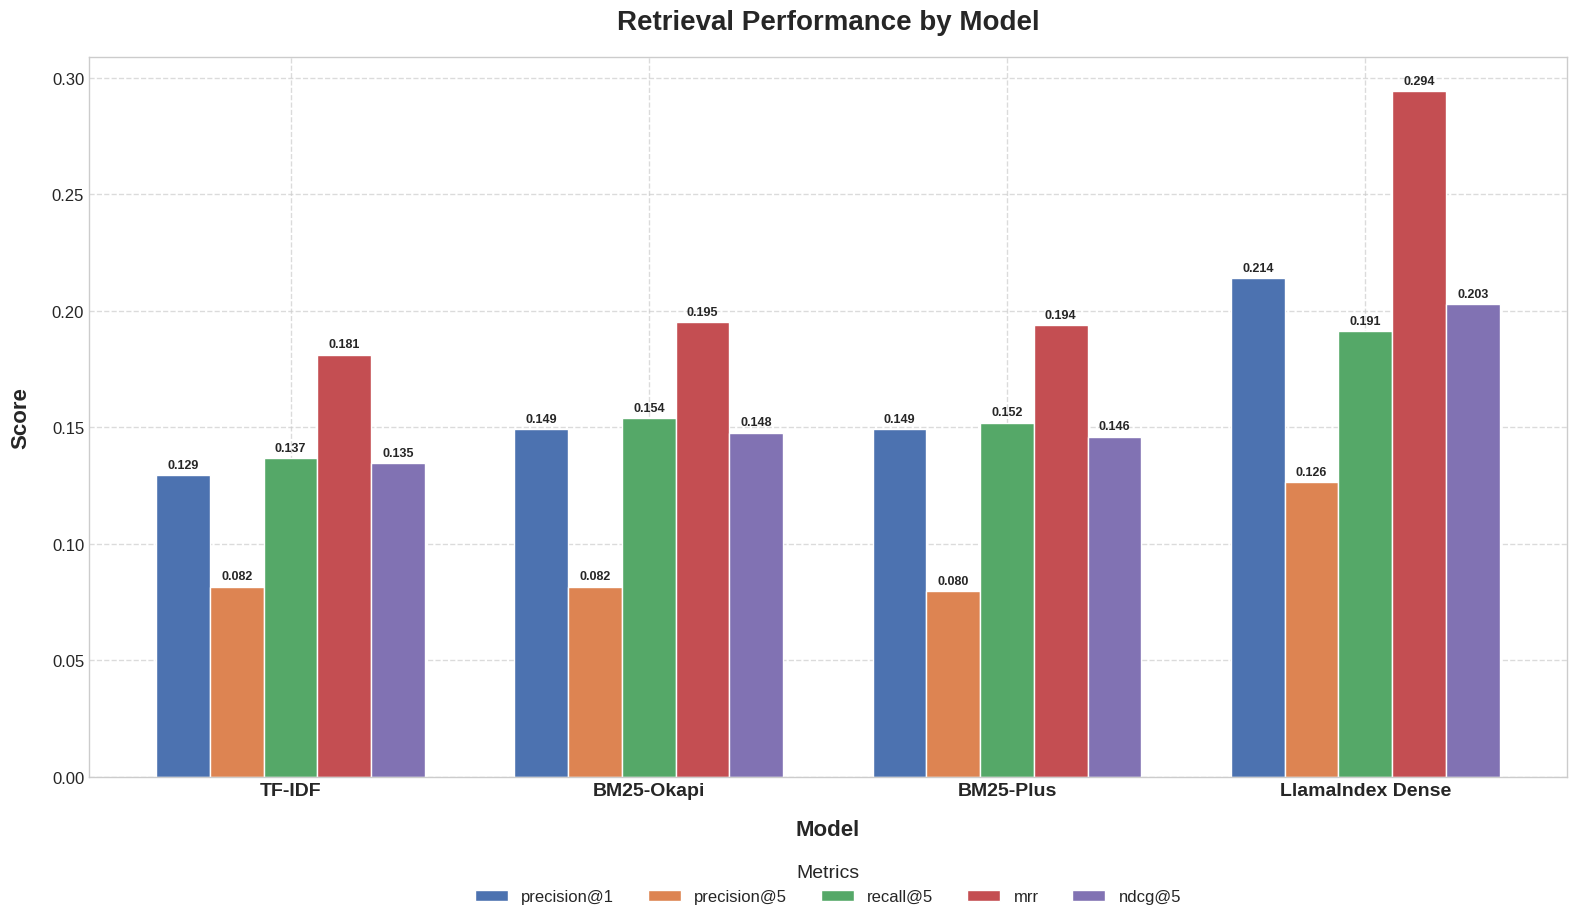

Performance plot saved to /content/drive/MyDrive/legal-rag-assistant/Notebooks/results/retrieval_performance_20250507_174253.png


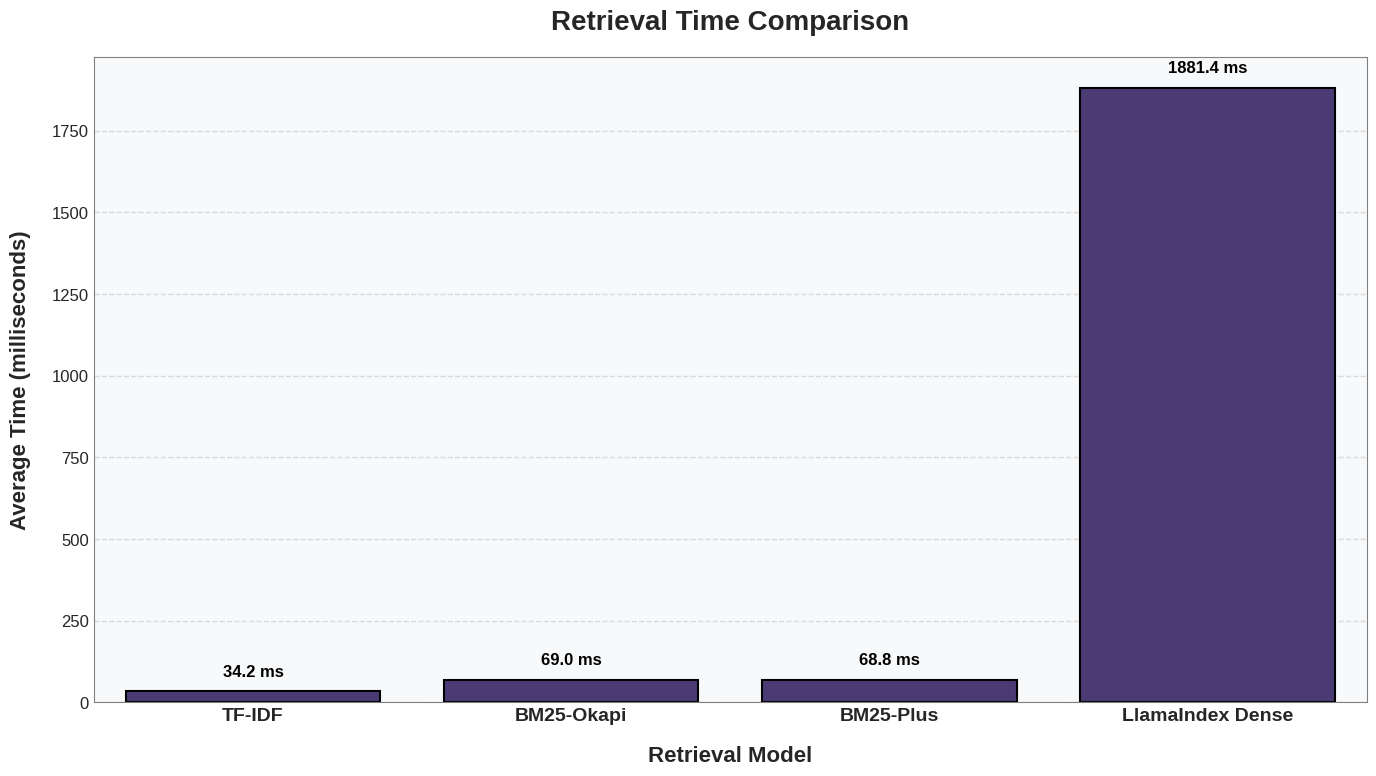

Time comparison plot saved to /content/drive/MyDrive/legal-rag-assistant/Notebooks/results/retrieval_time_20250507_174253.png


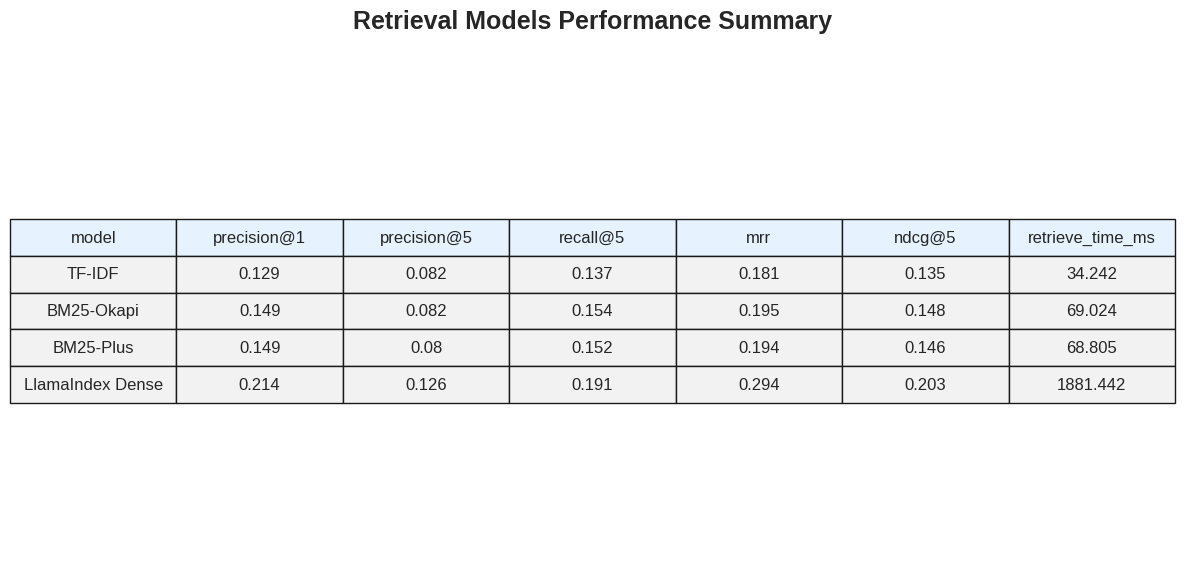

Summary table saved to /content/drive/MyDrive/legal-rag-assistant/Notebooks/results/retrieval_summary_20250507_174253.png


In [31]:
def evaluate_baselines(sparse_models, dense_models, questions, output_dir="results"):
    """Evaluate baseline sparse and dense models with progress tracking and saving results."""
    # Create output directory
    os.makedirs(output_dir, exist_ok=True)
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

    # Prepare results list
    results = []

    # Setup overall progress bar
    models = list(sparse_models.items()) + list(dense_models.items())
    overall_pbar = tqdm(total=len(models), desc="Overall evaluation progress")

    # Evaluate TF-IDF
    print("Evaluating TF-IDF model...")
    tfidf_results = evaluate_model(sparse_models['tfidf'], questions, corpus_data['article_lookup'])
    tfidf_results["model"] = "TF-IDF"
    tfidf_results["retrieve_time_ms"] = tfidf_results["time"] * 1000  # Convert to ms
    results.append(tfidf_results)
    overall_pbar.update(1)

    # Evaluate BM25-Okapi
    print("Evaluating BM25-Okapi model...")
    bm25_okapi_results = evaluate_model(sparse_models['bm25_okapi'], questions, corpus_data['article_lookup'])
    bm25_okapi_results["model"] = "BM25-Okapi"
    bm25_okapi_results["retrieve_time_ms"] = bm25_okapi_results["time"] * 1000  # Convert to ms
    results.append(bm25_okapi_results)
    overall_pbar.update(1)

    # Evaluate BM25-Plus
    print("Evaluating BM25-Plus model...")
    bm25_plus_results = evaluate_model(sparse_models['bm25_plus'], questions, corpus_data['article_lookup'])
    bm25_plus_results["model"] = "BM25-Plus"
    bm25_plus_results["retrieve_time_ms"] = bm25_plus_results["time"] * 1000  # Convert to ms
    results.append(bm25_plus_results)
    overall_pbar.update(1)

    # Evaluate Dense (LlamaIndex)
    print("Evaluating Dense model...")
    dense_results = evaluate_model(dense_models['dense'], questions, corpus_data['article_lookup'])
    dense_results["model"] = "LlamaIndex Dense"
    dense_results["retrieve_time_ms"] = dense_results["time"] * 1000  # Convert to ms
    results.append(dense_results)
    overall_pbar.update(1)

    overall_pbar.close()

    # Convert to DataFrame for easier comparison
    results_df = pd.DataFrame(results)

    # Save results to CSV
    csv_path = f"{output_dir}/retrieval_evaluation_{timestamp}.csv"
    results_df.to_csv(csv_path, index=False)
    print(f"Results saved to {csv_path}")

    # Improved Performance Metrics Visualization
    metrics_to_plot = ["precision@1", "precision@5", "recall@5", "mrr", "ndcg@5"]

    # Create a more readable grouped bar chart
    plt.figure(figsize=(16, 10))

    # Set a professional style
    plt.style.use('seaborn-v0_8-whitegrid')

    # Prepare data for grouped bar chart
    x = np.arange(len(results_df["model"]))
    width = 0.15  # Width of each bar
    multiplier = 0

    fig, ax = plt.subplots(figsize=(16, 10))

    # Plot each metric as a group of bars
    for metric in metrics_to_plot:
        offset = width * multiplier
        rects = ax.bar(x + offset, results_df[metric], width, label=metric)

        # Add value labels above the bars
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.3f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=9, fontweight='bold')
        multiplier += 1

    # Add labels and title with improved formatting
    ax.set_title('Retrieval Performance by Model', fontsize=20, fontweight='bold', pad=20)
    ax.set_xlabel('Model', fontsize=16, fontweight='bold', labelpad=15)
    ax.set_ylabel('Score', fontsize=16, fontweight='bold', labelpad=15)

    # Set x-ticks at the center of the groups
    ax.set_xticks(x + width * 2)
    ax.set_xticklabels(results_df["model"], fontsize=14, fontweight='bold')

    # Increase y-axis tick label size
    ax.tick_params(axis='y', labelsize=12)

    # Add a legend with enhanced visibility
    ax.legend(title='Metrics', title_fontsize=14, fontsize=12,
              loc='upper center', bbox_to_anchor=(0.5, -0.1),
              fancybox=True, shadow=True, ncol=5)

    # Add a grid for better readability
    ax.grid(True, linestyle='--', alpha=0.7)

    # Adjust layout and save
    plt.tight_layout(rect=[0, 0.05, 1, 1])
    metrics_plot_path = f"{output_dir}/retrieval_performance_{timestamp}.png"
    plt.savefig(metrics_plot_path, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Performance plot saved to {metrics_plot_path}")

    # Improved Retrieval Time Visualization
    plt.figure(figsize=(14, 8))

    # Create a more visually appealing bar chart
    # Use Seaborn's custom palette for better color distinction
    sns.set_palette("viridis")

    ax = sns.barplot(
        x="model",
        y="retrieve_time_ms",
        data=results_df,
        edgecolor='black',
        linewidth=1.5
    )

    # Add value labels above the bars with better formatting
    for i, bar in enumerate(ax.patches):
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2.,
            height + max(results_df['retrieve_time_ms']) * 0.02,  # Position 2% above highest bar
            f"{results_df['retrieve_time_ms'].iloc[i]:.1f} ms",
            ha="center",
            va='bottom',
            fontsize=12,
            fontweight='bold',
            color='black'
        )

    # Enhance title and labels
    plt.title("Retrieval Time Comparison", fontsize=20, fontweight='bold', pad=20)
    plt.ylabel("Average Time (milliseconds)", fontsize=16, fontweight='bold', labelpad=15)
    plt.xlabel("Retrieval Model", fontsize=16, fontweight='bold', labelpad=15)

    # Increase tick label size
    plt.xticks(fontsize=14, fontweight='bold')
    plt.yticks(fontsize=12)

    # Add a subtle grid
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add a subtle background shade
    ax.set_facecolor('#f8f9fa')

    # Add border to the plot
    for spine in ax.spines.values():
        spine.set_edgecolor('gray')
        spine.set_linewidth(0.8)

    plt.tight_layout()

    # Save time plot
    time_plot_path = f"{output_dir}/retrieval_time_{timestamp}.png"
    plt.savefig(time_plot_path, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Time comparison plot saved to {time_plot_path}")

    # Create a summary table visualization
    plt.figure(figsize=(12, 6))

    # Select the most important columns and round values
    display_df = results_df[["model", "precision@1", "precision@5",
                          "recall@5", "mrr", "ndcg@5", "retrieve_time_ms"]].copy()

    # Round numeric values for display
    for col in display_df.columns[1:]:
        display_df[col] = display_df[col].round(3)

    # Create a table plot
    ax = plt.subplot(111, frame_on=False)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

    table = plt.table(
        cellText=display_df.values,
        colLabels=display_df.columns,
        cellLoc='center',
        loc='center',
        cellColours=[['#f2f2f2']*len(display_df.columns)]*len(display_df),
        colColours=['#e6f3ff']*len(display_df.columns),
    )

    # Style the table
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 2)

    plt.title("Retrieval Models Performance Summary", fontsize=18, fontweight='bold', pad=20)
    plt.tight_layout()

    # Save summary table
    summary_path = f"{output_dir}/retrieval_summary_{timestamp}.png"
    plt.savefig(summary_path, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Summary table saved to {summary_path}")

    return results_df

# Create results directory
if not os.path.exists('/content/drive/MyDrive/legal-rag-assistant/Notebooks/results'):
    os.makedirs('/content/drive/MyDrive/legal-rag-assistant/Notebooks/results')

# Evaluate baseline models on dev set
baseline_results = evaluate_baselines(sparse_models, dense_models, data["dev"], output_dir="/content/drive/MyDrive/legal-rag-assistant/Notebooks/results")

## 5. Key Hybrid Strategies to Implement

### 5.1 Linear Combination (Score Fusion)

In [32]:
class LinearHybridRetriever:
    """Linear combination of sparse and dense retrievers with weighted scoring."""

    def __init__(self, sparse_model, dense_model, alpha=0.5):
        """
        Args:
            sparse_model: A sparse retrieval model (TF-IDF or BM25)
            dense_model: A dense retrieval model
            alpha: Weight for sparse results (1-alpha for dense)
        """
        self.sparse_model = sparse_model
        self.dense_model = dense_model
        self.alpha = alpha
        self.name = f"Linear({self.sparse_model.__class__.__name__}+{self.dense_model.__class__.__name__}, α={alpha})"

    def retrieve(self, query, top_k=5, aggregate_k=20):
        """
        Retrieve documents using both models and combine scores.

        Args:
            query: The query text
            top_k: Number of final results to return
            aggregate_k: Number of results to retrieve from each model

        Returns:
            List of (doc_id, score) tuples
        """
        # Get results from both retrievers
        sparse_results = self.sparse_model.retrieve(query, top_k=aggregate_k)
        dense_results = self.dense_model.retrieve(query, top_k=aggregate_k)

        # Normalize scores within each result set (min-max normalization)
        sparse_scores = {doc_id: score for doc_id, score in sparse_results}
        dense_scores = {doc_id: score for doc_id, score in dense_results}

        if sparse_scores:
            sparse_min = min(sparse_scores.values())
            sparse_max = max(sparse_scores.values())
            sparse_range = sparse_max - sparse_min if sparse_max > sparse_min else 1
            sparse_scores = {k: (v - sparse_min) / sparse_range for k, v in sparse_scores.items()}

        if dense_scores:
            dense_min = min(dense_scores.values())
            dense_max = max(dense_scores.values())
            dense_range = dense_max - dense_min if dense_max > dense_min else 1
            dense_scores = {k: (v - dense_min) / dense_range for k, v in dense_scores.items()}

        # Combine results
        all_doc_ids = set(sparse_scores.keys()) | set(dense_scores.keys())
        combined_scores = {}

        for doc_id in all_doc_ids:
            sparse_score = sparse_scores.get(doc_id, 0.0)
            dense_score = dense_scores.get(doc_id, 0.0)
            combined_scores[doc_id] = self.alpha * sparse_score + (1 - self.alpha) * dense_score

        # Sort and return top-k results
        sorted_results = sorted(combined_scores.items(), key=lambda x: x[1], reverse=True)
        return sorted_results[:top_k]

#### Tune the alpha parameter for LinearHybridRetriever

Evaluating alpha=0.1...


Evaluating LinearHybridRetriever:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluating alpha=0.3...


Evaluating LinearHybridRetriever:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluating alpha=0.5...


Evaluating LinearHybridRetriever:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluating alpha=0.7...


Evaluating LinearHybridRetriever:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluating alpha=0.9...


Evaluating LinearHybridRetriever:   0%|          | 0/50 [00:00<?, ?it/s]

Results saved to /content/drive/MyDrive/legal-rag-assistant/Notebooks/tuning/linear/alpha_tuning_20250507_181414.csv


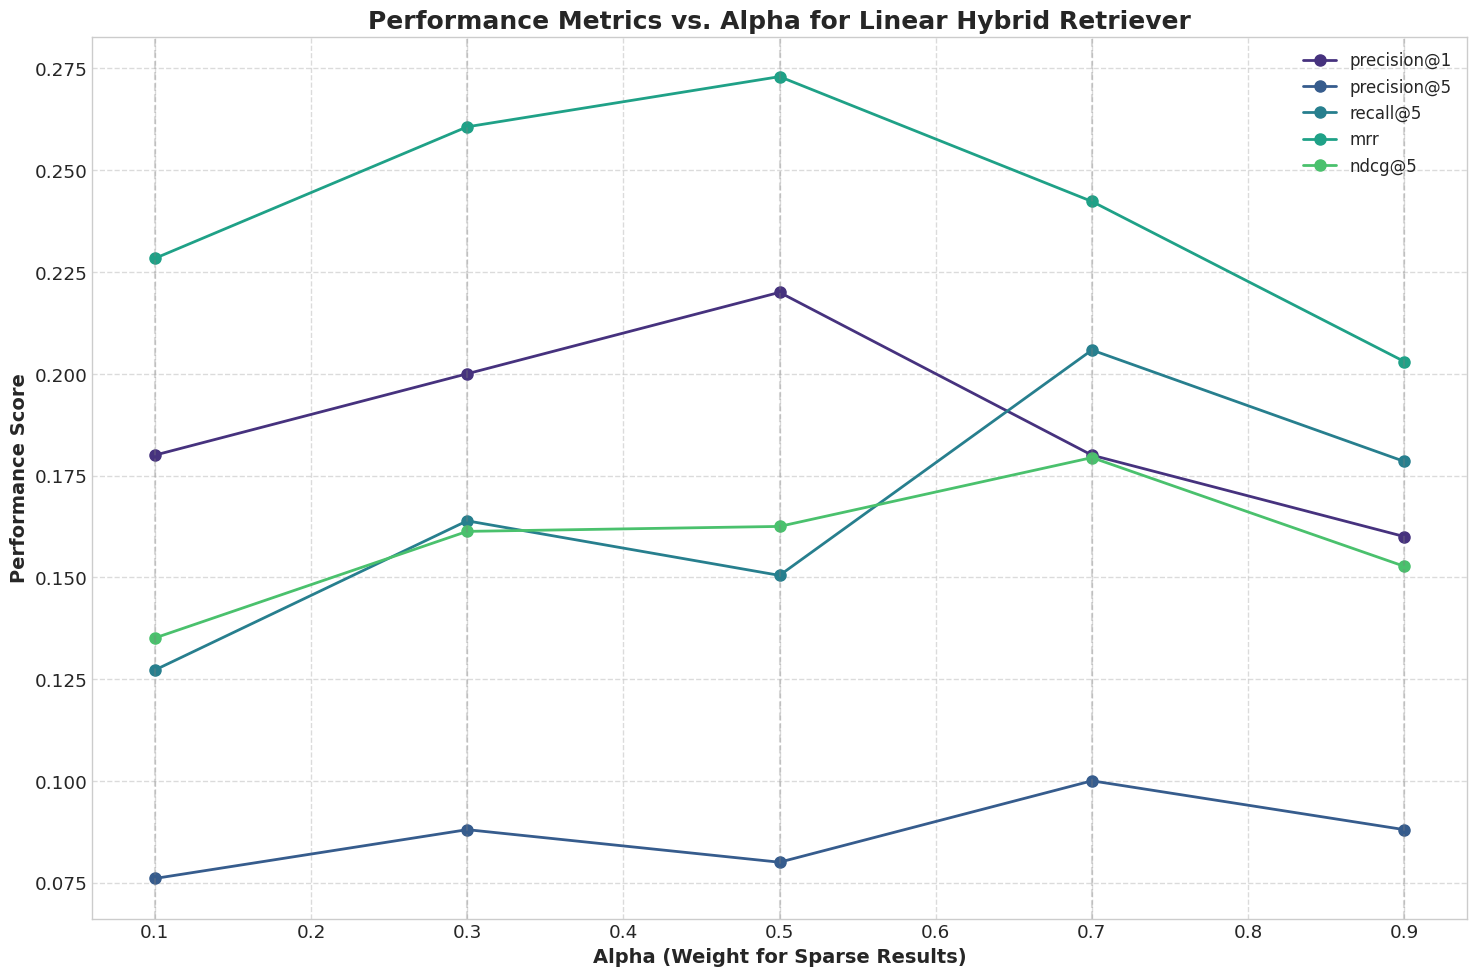

Performance plot saved to /content/drive/MyDrive/legal-rag-assistant/Notebooks/tuning/linear/alpha_tuning_plot_20250507_181414.png


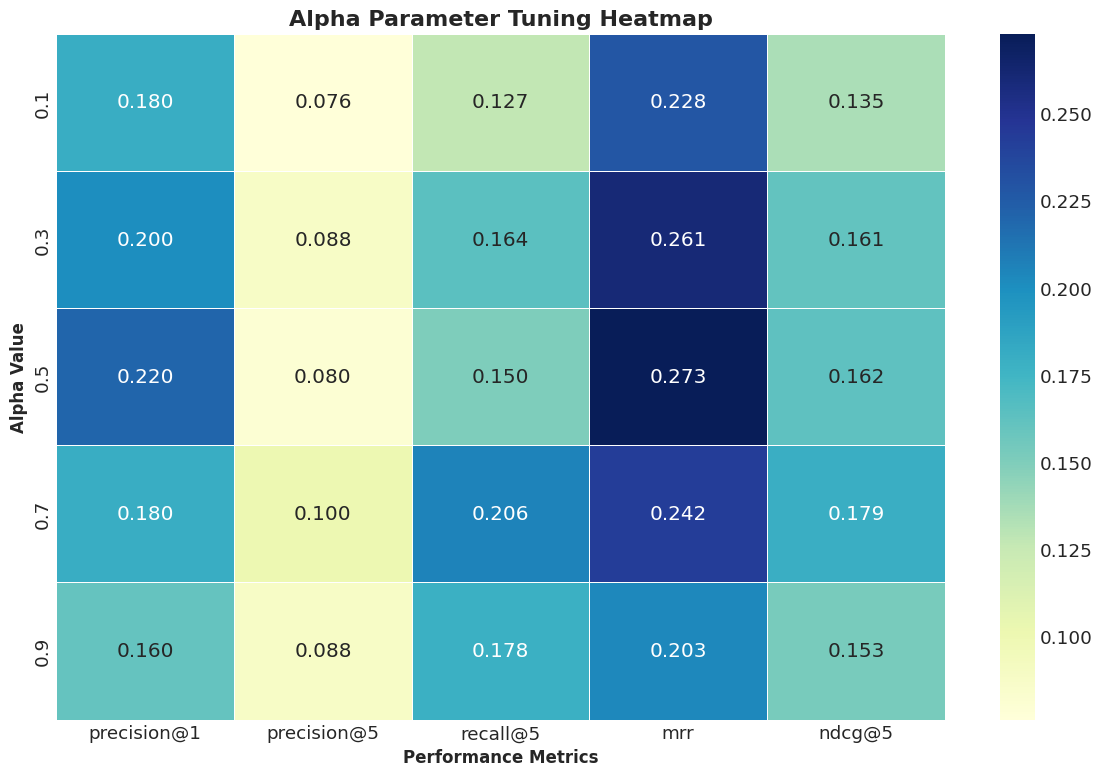

Heatmap saved to /content/drive/MyDrive/legal-rag-assistant/Notebooks/tuning/linear/alpha_tuning_heatmap_20250507_181414.png


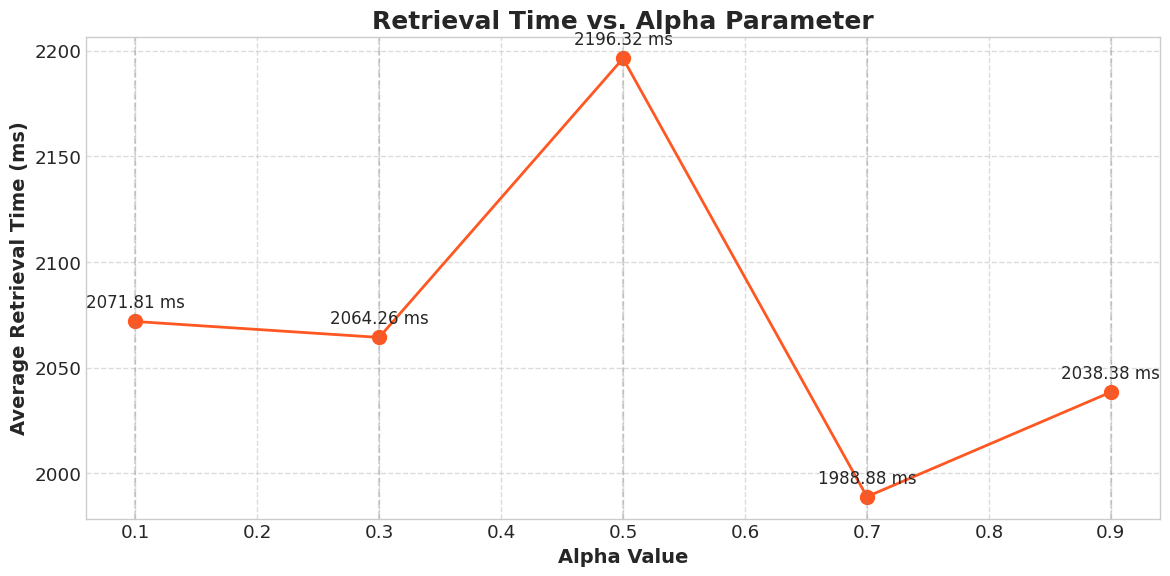

Timing plot saved to /content/drive/MyDrive/legal-rag-assistant/Notebooks/tuning/linear/alpha_timing_plot_20250507_181414.png


,Alpha,Avg. Retrieval Time (ms)
0,0.1,2071.812530
1,0.3,2064.264541
2,0.5,2196.321368
3,0.7,1988.881989
4,0.9,2038.383541



Optimal Alpha Values by Metric:
  - precision@1: α = 0.5
  - precision@5: α = 0.7
  - recall@5: α = 0.7
  - mrr: α = 0.5
  - ndcg@5: α = 0.7

Fastest alpha: 0.7 (1988.88 ms)
Best performing alpha (0.7) is 0.0% slower than fastest alpha.

Recommended overall best alpha: 0.7


In [43]:
# Import necessary dependencies
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

def tune_linear_hybrid_alpha(sparse_models, dense_models, data, corpus_data, alphas=[0.1, 0.3, 0.5, 0.7, 0.9], output_dir="tuning"):
    """
    Tune the alpha parameter for LinearHybridRetriever with retrieval time analysis.

    Args:
        sparse_models: Dictionary of sparse retrieval models
        dense_models: Dictionary of dense retrieval models
        data: The dataset containing questions and reference articles
        corpus_data: Dictionary containing corpus information
        alphas: List of alpha values to evaluate
        output_dir: Directory to save results
    """
    # Create output directory
    os.makedirs(output_dir, exist_ok=True)
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

    # We'll use the best sparse model (determined in baseline evaluation)
    sparse_model = sparse_models["bm25_plus"]  # Change to your best sparse model
    dense_model = dense_models["dense"]

    # Store results for each alpha value
    results = []

    # Evaluate each alpha
    for alpha in alphas:
        print(f"Evaluating alpha={alpha}...")

        # Create hybrid retriever with current alpha
        hybrid_retriever = LinearHybridRetriever(sparse_model, dense_model, alpha=alpha)

        # Evaluate on dev set
        hybrid_results = evaluate_model(hybrid_retriever, data["dev"][:50], corpus_data['article_lookup'])

        # Store results with alpha value
        hybrid_results["alpha"] = alpha
        hybrid_results["model"] = f"Linear Hybrid α={alpha}"
        hybrid_results["retrieve_time_ms"] = hybrid_results["time"] * 1000  # Convert to ms
        results.append(hybrid_results)

    # Convert to DataFrame
    results_df = pd.DataFrame(results)

    # Save results to CSV
    csv_path = f"{output_dir}/alpha_tuning_{timestamp}.csv"
    results_df.to_csv(csv_path, index=False)
    print(f"Results saved to {csv_path}")

    # Create visualization of performance metrics by alpha
    metrics_to_plot = ["precision@1", "precision@5", "recall@5", "mrr", "ndcg@5"]

    # Set up the plot style
    plt.figure(figsize=(15, 10))
    sns.set_style("whitegrid")
    sns.set_palette("viridis")

    # Plot each metric
    for metric in metrics_to_plot:
        plt.plot(results_df["alpha"], results_df[metric], marker='o', linewidth=2, markersize=8, label=metric)

    # Add labels and title
    plt.xlabel("Alpha (Weight for Sparse Results)", fontsize=14, fontweight='bold')
    plt.ylabel("Performance Score", fontsize=14, fontweight='bold')
    plt.title("Performance Metrics vs. Alpha for Linear Hybrid Retriever", fontsize=18, fontweight='bold')
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)

    # Add vertical lines at each alpha for better readability
    for alpha in alphas:
        plt.axvline(x=alpha, color='gray', linestyle='--', alpha=0.3)

    # Save the plot
    plot_path = f"{output_dir}/alpha_tuning_plot_{timestamp}.png"
    plt.tight_layout()
    plt.savefig(plot_path, dpi=300)
    plt.show()
    print(f"Performance plot saved to {plot_path}")

    # Create a heatmap for better visualization of optimal alpha
    plt.figure(figsize=(12, 8))

    # Prepare data for heatmap (reshape to have metrics as columns)
    heatmap_data = results_df[["alpha"] + metrics_to_plot].copy()
    heatmap_data = heatmap_data.set_index("alpha")

    # Create heatmap with annotations
    ax = sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="YlGnBu", linewidths=.5)

    # Add labels and title
    plt.title("Alpha Parameter Tuning Heatmap", fontsize=16, fontweight='bold')
    plt.xlabel("Performance Metrics", fontsize=12, fontweight='bold')
    plt.ylabel("Alpha Value", fontsize=12, fontweight='bold')

    # Save heatmap
    heatmap_path = f"{output_dir}/alpha_tuning_heatmap_{timestamp}.png"
    plt.tight_layout()
    plt.savefig(heatmap_path, dpi=300)
    plt.show()
    print(f"Heatmap saved to {heatmap_path}")

    # NEW: Create a plot for retrieval time by alpha
    plt.figure(figsize=(12, 6))
    plt.plot(results_df["alpha"], results_df["retrieve_time_ms"],
             marker='o', color='#FF5722', linewidth=2, markersize=10)

    # Add value labels
    for i, time in enumerate(results_df["retrieve_time_ms"]):
        plt.annotate(f"{time:.2f} ms",
                    (results_df["alpha"][i], time),
                    textcoords="offset points",
                    xytext=(0,10),
                    ha='center',
                    fontsize=12)

    plt.xlabel("Alpha Value", fontsize=14, fontweight='bold')
    plt.ylabel("Average Retrieval Time (ms)", fontsize=14, fontweight='bold')
    plt.title("Retrieval Time vs. Alpha Parameter", fontsize=18, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.7)

    # Add vertical lines at each alpha for better readability
    for alpha in alphas:
        plt.axvline(x=alpha, color='gray', linestyle='--', alpha=0.3)

    time_plot_path = f"{output_dir}/alpha_timing_plot_{timestamp}.png"
    plt.tight_layout()
    plt.savefig(time_plot_path, dpi=300)
    plt.show()
    print(f"Timing plot saved to {time_plot_path}")

    # NEW: Add timing information to table summary
    time_df = results_df[["alpha", "retrieve_time_ms"]].copy()
    time_df.columns = ["Alpha", "Avg. Retrieval Time (ms)"]
    display(time_df)

    # Find the optimal alpha
    optimal_alpha_by_metric = {}
    for metric in metrics_to_plot:
        best_idx = results_df[metric].idxmax()
        optimal_alpha_by_metric[metric] = results_df.loc[best_idx, "alpha"]

    print("\nOptimal Alpha Values by Metric:")
    for metric, alpha in optimal_alpha_by_metric.items():
        print(f"  - {metric}: α = {alpha}")

    # Find overall best alpha (using average rank across metrics)
    metric_ranks = {}
    for metric in metrics_to_plot:
        sorted_indices = results_df[metric].argsort()
        ranks = sorted_indices.argsort()
        metric_ranks[metric] = ranks

    avg_ranks = pd.DataFrame(metric_ranks).mean(axis=1)
    best_overall_alpha = results_df.loc[avg_ranks.idxmax(), "alpha"]

    # NEW: Find fastest alpha
    fastest_alpha = results_df.loc[results_df["retrieve_time_ms"].idxmin(), "alpha"]
    fastest_time = results_df["retrieve_time_ms"].min()
    print(f"\nFastest alpha: {fastest_alpha} ({fastest_time:.2f} ms)")

    # Calculate percentage slowdown for best alpha compared to fastest
    best_time = results_df.loc[results_df["alpha"] == best_overall_alpha, "retrieve_time_ms"].values[0]
    slowdown = ((best_time - fastest_time) / fastest_time) * 100
    print(f"Best performing alpha ({best_overall_alpha}) is {slowdown:.1f}% slower than fastest alpha.")

    print(f"\nRecommended overall best alpha: {best_overall_alpha}")

    return {
        "results_df": results_df,
        "optimal_alpha_by_metric": optimal_alpha_by_metric,
        "best_overall_alpha": best_overall_alpha,
        "fastest_alpha": fastest_alpha
    }

# Create tuning directory
if not os.path.exists('/content/drive/MyDrive/legal-rag-assistant/Notebooks/tuning/linear'):
    os.makedirs('/content/drive/MyDrive/legal-rag-assistant/Notebooks/tuning/linear')

# Tune alpha parameter and get results
alpha_tuning_results = tune_linear_hybrid_alpha(
    sparse_models,
    dense_models,
    data,
    corpus_data,
    alphas=[0.1, 0.3, 0.5, 0.7, 0.9],
    output_dir="/content/drive/MyDrive/legal-rag-assistant/Notebooks/tuning/linear"
)

# Create a final hybrid retriever with the optimal alpha
best_alpha = alpha_tuning_results["best_overall_alpha"]

In [44]:
print(f"Creating final hybrid retriever with optimal alpha = {best_alpha}")

best_linear_retriever = LinearHybridRetriever(
    sparse_models["bm25_plus"],
    dense_models["dense"],
    alpha=best_alpha
)

Creating final hybrid retriever with optimal alpha = 0.7


### 5.2 Reciprocal Rank Fusion (RRF)


In [45]:
class ReciprocalRankFusionRetriever:
    """Implements Reciprocal Rank Fusion for combining multiple retrieval methods."""

    def __init__(self, retrievers, k=60):
        """
        Args:
            retrievers: List of retriever models
            k: Constant to prevent items with very low ranks from having too much influence
        """
        self.retrievers = retrievers
        self.k = k
        self.name = f"RRF({'+'.join(r.__class__.__name__ for r in retrievers)})"

    def retrieve(self, query, top_k=5, per_retriever_k=50):
        """Retrieve documents using RRF ranking."""
        # Get results from all retrievers
        all_results = []
        for retriever in self.retrievers:
            results = retriever.retrieve(query, top_k=per_retriever_k)
            all_results.append(results)

        # Calculate RRF scores
        rrf_scores = {}

        for result_set in all_results:
            for rank, (doc_id, _) in enumerate(result_set):
                if doc_id not in rrf_scores:
                    rrf_scores[doc_id] = 0
                # RRF formula: 1 / (k + rank)
                rrf_scores[doc_id] += 1 / (self.k + rank + 1)  # +1 because rank is 0-indexed

        # Sort by RRF score and return top-k
        sorted_results = sorted(rrf_scores.items(), key=lambda x: x[1], reverse=True)
        return sorted_results[:top_k]

#### Tune the k parameter for ReciprocalRankFusion

Evaluating RRF with k=20...


Evaluating ReciprocalRankFusionRetriever:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluating RRF with k=60...


Evaluating ReciprocalRankFusionRetriever:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluating RRF with k=100...


Evaluating ReciprocalRankFusionRetriever:   0%|          | 0/50 [00:00<?, ?it/s]

Results saved to /content/drive/MyDrive/legal-rag-assistant/Notebooks/tuning/rrf/rrf_k_tuning_20250507_182255.csv


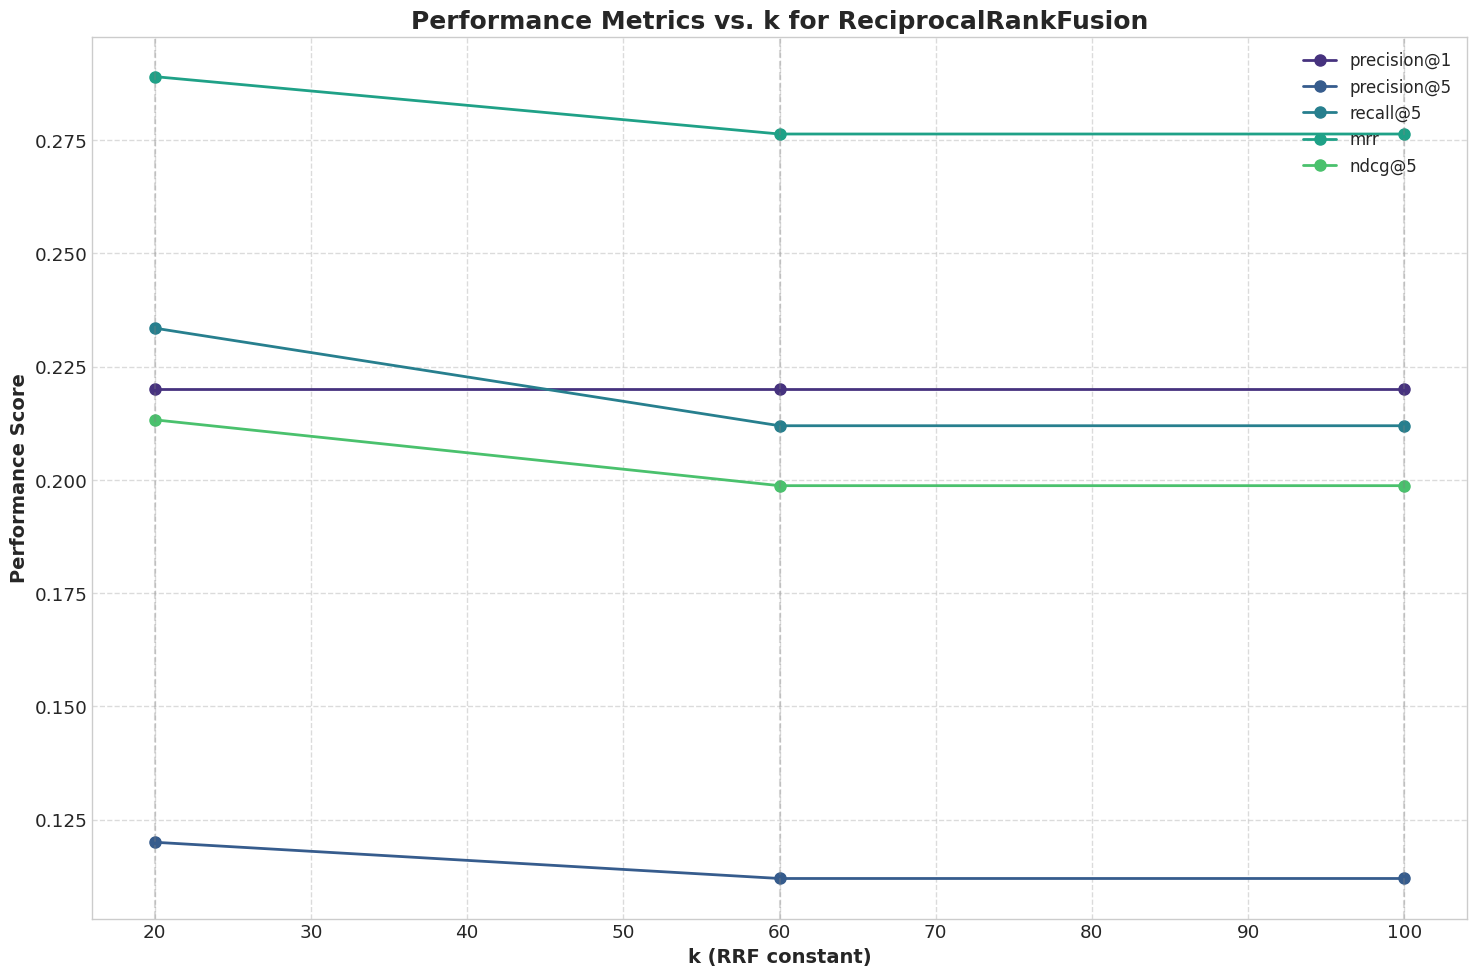

Performance plot saved to /content/drive/MyDrive/legal-rag-assistant/Notebooks/tuning/rrf/rrf_k_tuning_plot_20250507_182255.png


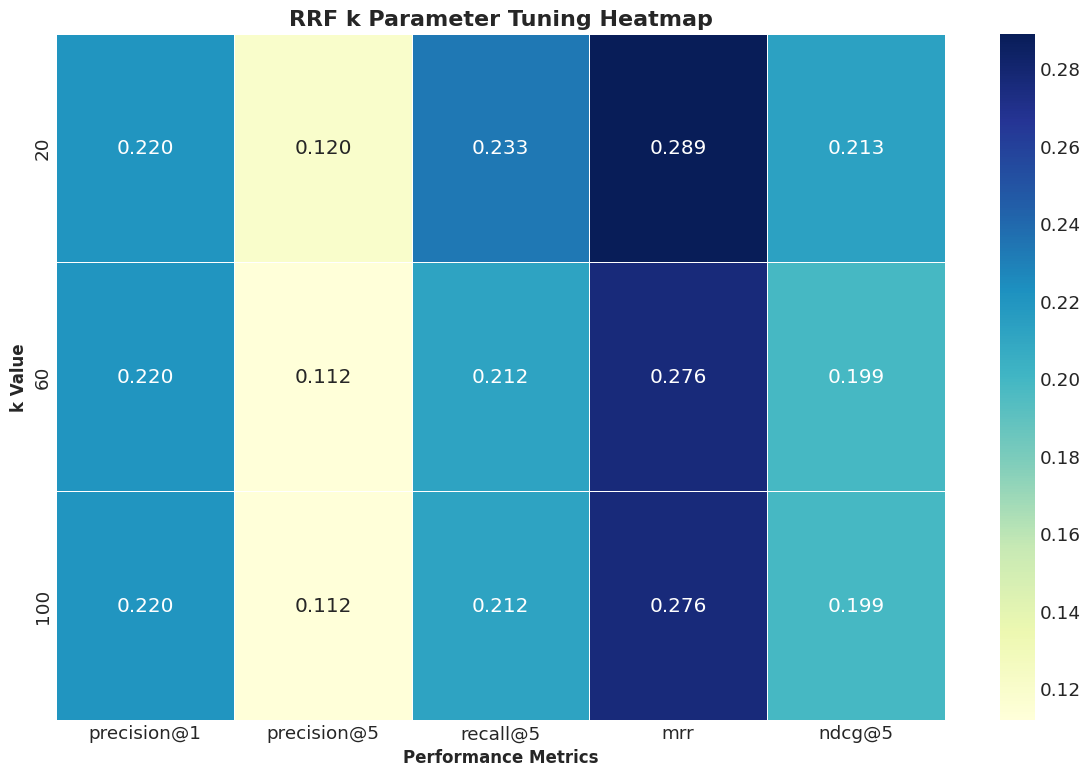

Heatmap saved to /content/drive/MyDrive/legal-rag-assistant/Notebooks/tuning/rrf/rrf_k_tuning_heatmap_20250507_182255.png


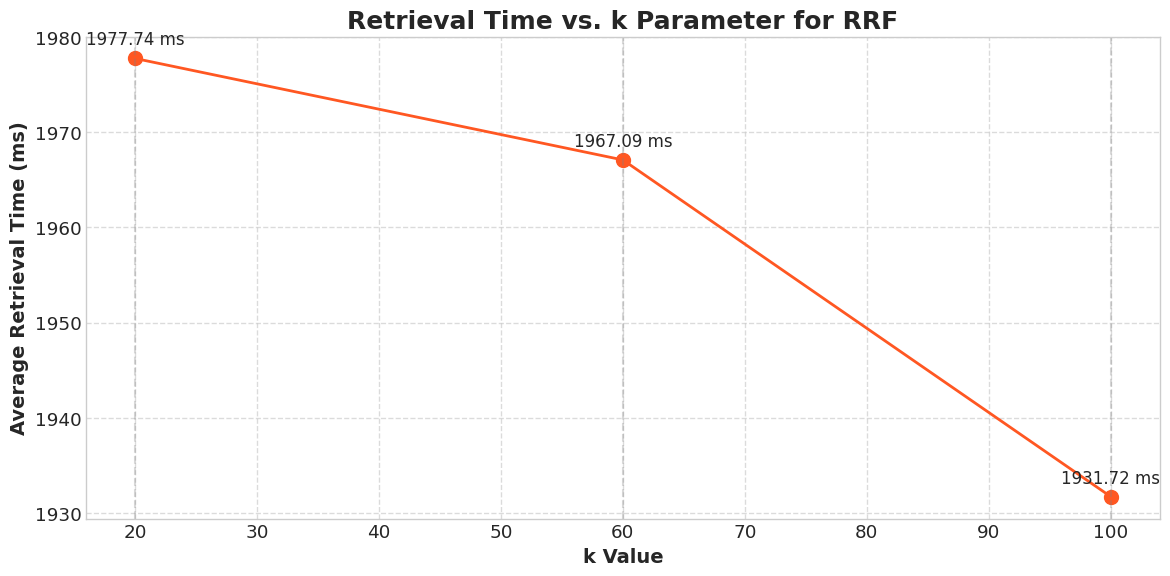

Timing plot saved to /content/drive/MyDrive/legal-rag-assistant/Notebooks/tuning/rrf/rrf_k_timing_plot_20250507_182255.png


,k Value,Avg. Retrieval Time (ms)
0,20,1977.743316
1,60,1967.085195
2,100,1931.724062



Optimal k Values by Metric:
  - precision@1: k = 20
  - precision@5: k = 20
  - recall@5: k = 20
  - mrr: k = 20
  - ndcg@5: k = 20

Fastest k value: 100 (1931.72 ms)
Best performing k (20) is 2.4% slower than fastest k.

Recommended overall best k: 20


In [46]:
# Import necessary dependencies
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

def tune_rrf_k(sparse_models, dense_models, data, corpus_data, k_values=[20, 60, 100], output_dir="tuning"):
    """
    Tune the k parameter for ReciprocalRankFusion with retrieval time analysis.

    Args:
        sparse_models: Dictionary of sparse retrieval models
        dense_models: Dictionary of dense retrieval models
        data: The dataset containing questions and reference articles
        corpus_data: Dictionary containing corpus information
        k_values: List of k values to evaluate
        output_dir: Directory to save results
    """
    # Create output directory
    os.makedirs(output_dir, exist_ok=True)
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

    # We'll use the best sparse model (BM25 Plus) and the dense model
    sparse_model = sparse_models["bm25_plus"]
    dense_model = dense_models["dense"]

    # Store results for each k value
    results = []

    # Evaluate each k value
    for k in k_values:
        print(f"Evaluating RRF with k={k}...")

        # Create RRF retriever with current k value
        rrf_retriever = ReciprocalRankFusionRetriever([sparse_model, dense_model], k=k)

        # Evaluate on dev set - using a subset for quicker tuning
        rrf_results = evaluate_model(rrf_retriever, data["dev"][:50], corpus_data['article_lookup'])

        # Store results with k value
        rrf_results["k"] = k
        rrf_results["model"] = f"RRF k={k}"
        rrf_results["retrieve_time_ms"] = rrf_results["time"] * 1000  # Convert to ms
        results.append(rrf_results)

    # Convert to DataFrame
    results_df = pd.DataFrame(results)

    # Save results to CSV
    csv_path = f"{output_dir}/rrf_k_tuning_{timestamp}.csv"
    results_df.to_csv(csv_path, index=False)
    print(f"Results saved to {csv_path}")

    # Create visualization of performance metrics by k value
    metrics_to_plot = ["precision@1", "precision@5", "recall@5", "mrr", "ndcg@5"]

    # Set up the plot style
    plt.figure(figsize=(15, 10))
    sns.set_style("whitegrid")
    sns.set_palette("viridis")

    # Plot each metric
    for metric in metrics_to_plot:
        plt.plot(results_df["k"], results_df[metric], marker='o', linewidth=2, markersize=8, label=metric)

    # Add labels and title
    plt.xlabel("k (RRF constant)", fontsize=14, fontweight='bold')
    plt.ylabel("Performance Score", fontsize=14, fontweight='bold')
    plt.title("Performance Metrics vs. k for ReciprocalRankFusion", fontsize=18, fontweight='bold')
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)

    # Add vertical lines at each k for better readability
    for k in k_values:
        plt.axvline(x=k, color='gray', linestyle='--', alpha=0.3)

    # Save the plot
    plot_path = f"{output_dir}/rrf_k_tuning_plot_{timestamp}.png"
    plt.tight_layout()
    plt.savefig(plot_path, dpi=300)
    plt.show()
    print(f"Performance plot saved to {plot_path}")

    # Create a heatmap for better visualization of optimal k
    plt.figure(figsize=(12, 8))

    # Prepare data for heatmap
    heatmap_data = results_df[["k"] + metrics_to_plot].copy()
    heatmap_data = heatmap_data.set_index("k")

    # Create heatmap with annotations
    ax = sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="YlGnBu", linewidths=.5)

    # Add labels and title
    plt.title("RRF k Parameter Tuning Heatmap", fontsize=16, fontweight='bold')
    plt.xlabel("Performance Metrics", fontsize=12, fontweight='bold')
    plt.ylabel("k Value", fontsize=12, fontweight='bold')

    # Save heatmap
    heatmap_path = f"{output_dir}/rrf_k_tuning_heatmap_{timestamp}.png"
    plt.tight_layout()
    plt.savefig(heatmap_path, dpi=300)
    plt.show()
    print(f"Heatmap saved to {heatmap_path}")

    # NEW: Create a plot for retrieval time by k value
    plt.figure(figsize=(12, 6))
    plt.plot(results_df["k"], results_df["retrieve_time_ms"],
             marker='o', color='#FF5722', linewidth=2, markersize=10)

    # Add value labels
    for i, time in enumerate(results_df["retrieve_time_ms"]):
        plt.annotate(f"{time:.2f} ms",
                    (results_df["k"][i], time),
                    textcoords="offset points",
                    xytext=(0,10),
                    ha='center',
                    fontsize=12)

    plt.xlabel("k Value", fontsize=14, fontweight='bold')
    plt.ylabel("Average Retrieval Time (ms)", fontsize=14, fontweight='bold')
    plt.title("Retrieval Time vs. k Parameter for RRF", fontsize=18, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.7)

    # Add vertical lines at each k for better readability
    for k in k_values:
        plt.axvline(x=k, color='gray', linestyle='--', alpha=0.3)

    time_plot_path = f"{output_dir}/rrf_k_timing_plot_{timestamp}.png"
    plt.tight_layout()
    plt.savefig(time_plot_path, dpi=300)
    plt.show()
    print(f"Timing plot saved to {time_plot_path}")

    # NEW: Add timing information to table summary
    time_df = results_df[["k", "retrieve_time_ms"]].copy()
    time_df.columns = ["k Value", "Avg. Retrieval Time (ms)"]
    display(time_df)

    # Find the optimal k value
    optimal_k_by_metric = {}
    for metric in metrics_to_plot:
        best_idx = results_df[metric].idxmax()
        optimal_k_by_metric[metric] = results_df.loc[best_idx, "k"]

    print("\nOptimal k Values by Metric:")
    for metric, k in optimal_k_by_metric.items():
        print(f"  - {metric}: k = {k}")

    # Find overall best k (using average rank across metrics)
    metric_ranks = {}
    for metric in metrics_to_plot:
        sorted_indices = results_df[metric].argsort()
        ranks = sorted_indices.argsort()
        metric_ranks[metric] = ranks

    avg_ranks = pd.DataFrame(metric_ranks).mean(axis=1)
    best_overall_k = results_df.loc[avg_ranks.idxmax(), "k"]

    # NEW: Find fastest k value
    fastest_k = results_df.loc[results_df["retrieve_time_ms"].idxmin(), "k"]
    fastest_time = results_df["retrieve_time_ms"].min()
    print(f"\nFastest k value: {fastest_k} ({fastest_time:.2f} ms)")

    # Calculate percentage slowdown for best k compared to fastest
    best_time = results_df.loc[results_df["k"] == best_overall_k, "retrieve_time_ms"].values[0]
    time_difference = ((best_time - fastest_time) / fastest_time) * 100
    print(f"Best performing k ({best_overall_k}) is {time_difference:.1f}% {'slower' if time_difference > 0 else 'faster'} than fastest k.")

    print(f"\nRecommended overall best k: {best_overall_k}")

    return {
        "results_df": results_df,
        "optimal_k_by_metric": optimal_k_by_metric,
        "best_overall_k": best_overall_k,
        "fastest_k": fastest_k
    }

# Create tuning directory if it doesn't exist
if not os.path.exists('/content/drive/MyDrive/legal-rag-assistant/Notebooks/tuning/rrf'):
    os.makedirs('/content/drive/MyDrive/legal-rag-assistant/Notebooks/tuning/rrf')

# Tune RRF k parameter and get results
rrf_tuning_results = tune_rrf_k(
    sparse_models,
    dense_models,
    data,
    corpus_data,
    k_values=[20, 60, 100],
    output_dir="/content/drive/MyDrive/legal-rag-assistant/Notebooks/tuning/rrf"
)

# Create a final RRF retriever with the optimal k
best_k = rrf_tuning_results["best_overall_k"]

In [47]:
print(f"Creating final RRF retriever with optimal k = {best_k}")

best_rrf_retriever = ReciprocalRankFusionRetriever(
    [sparse_models["bm25_plus"], dense_models["dense"]],
    k=best_k
)

Creating final RRF retriever with optimal k = 20


### 5.3 Cascading Retrieval (Pre-filter → Re-rank)

In [48]:
class CascadeRetriever:
    """Two-stage retrieval: Fast sparse filtering followed by precise dense re-ranking."""

    def __init__(self, first_stage_retriever, second_stage_retriever, corpus_data=None):
        """
        Args:
            first_stage_retriever: Fast retriever for initial document selection
            second_stage_retriever: More accurate retriever for re-ranking
            corpus_data: Dictionary containing corpus information
        """
        self.first_stage = first_stage_retriever
        self.second_stage = second_stage_retriever
        self.corpus_data = corpus_data
        self.name = f"Cascade({self.first_stage.__class__.__name__}→{self.second_stage.__class__.__name__})"

    def retrieve(self, query, top_k=5, first_stage_k=100):
        """Two-stage retrieval and re-ranking."""
        # First stage: retrieve candidate documents
        first_results = self.first_stage.retrieve(query, top_k=first_stage_k)
        candidate_ids = [doc_id for doc_id, _ in first_results]

        # Early return if first stage found nothing
        if not candidate_ids:
            return []

        # For second stage, simply retrieve using the same query but re-rank just the results
        second_results = self.second_stage.retrieve(query, top_k=first_stage_k)

        # Filter and reorder second_results based on candidate_ids from first stage
        filtered_results = []
        for doc_id, score in second_results:
            if doc_id in candidate_ids:
                filtered_results.append((doc_id, score))
                if len(filtered_results) >= top_k:
                    break

        # If we don't have enough results after filtering, add remaining from first stage
        if len(filtered_results) < top_k:
            seen_ids = set(doc_id for doc_id, _ in filtered_results)
            for doc_id, score in first_results:
                if doc_id not in seen_ids:
                    filtered_results.append((doc_id, score))
                    if len(filtered_results) >= top_k:
                        break

        return filtered_results[:top_k]

Evaluating Cascade with first_stage_k=50, top_k=5...


Cascade: first_k=50, top_k=5:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluating Cascade with first_stage_k=50, top_k=10...


Cascade: first_k=50, top_k=10:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluating Cascade with first_stage_k=100, top_k=5...


Cascade: first_k=100, top_k=5:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluating Cascade with first_stage_k=100, top_k=10...


Cascade: first_k=100, top_k=10:   0%|          | 0/50 [00:00<?, ?it/s]

Results saved to /content/drive/MyDrive/legal-rag-assistant/Notebooks/tuning/cascade/cascade_tuning_20250507_182752.csv


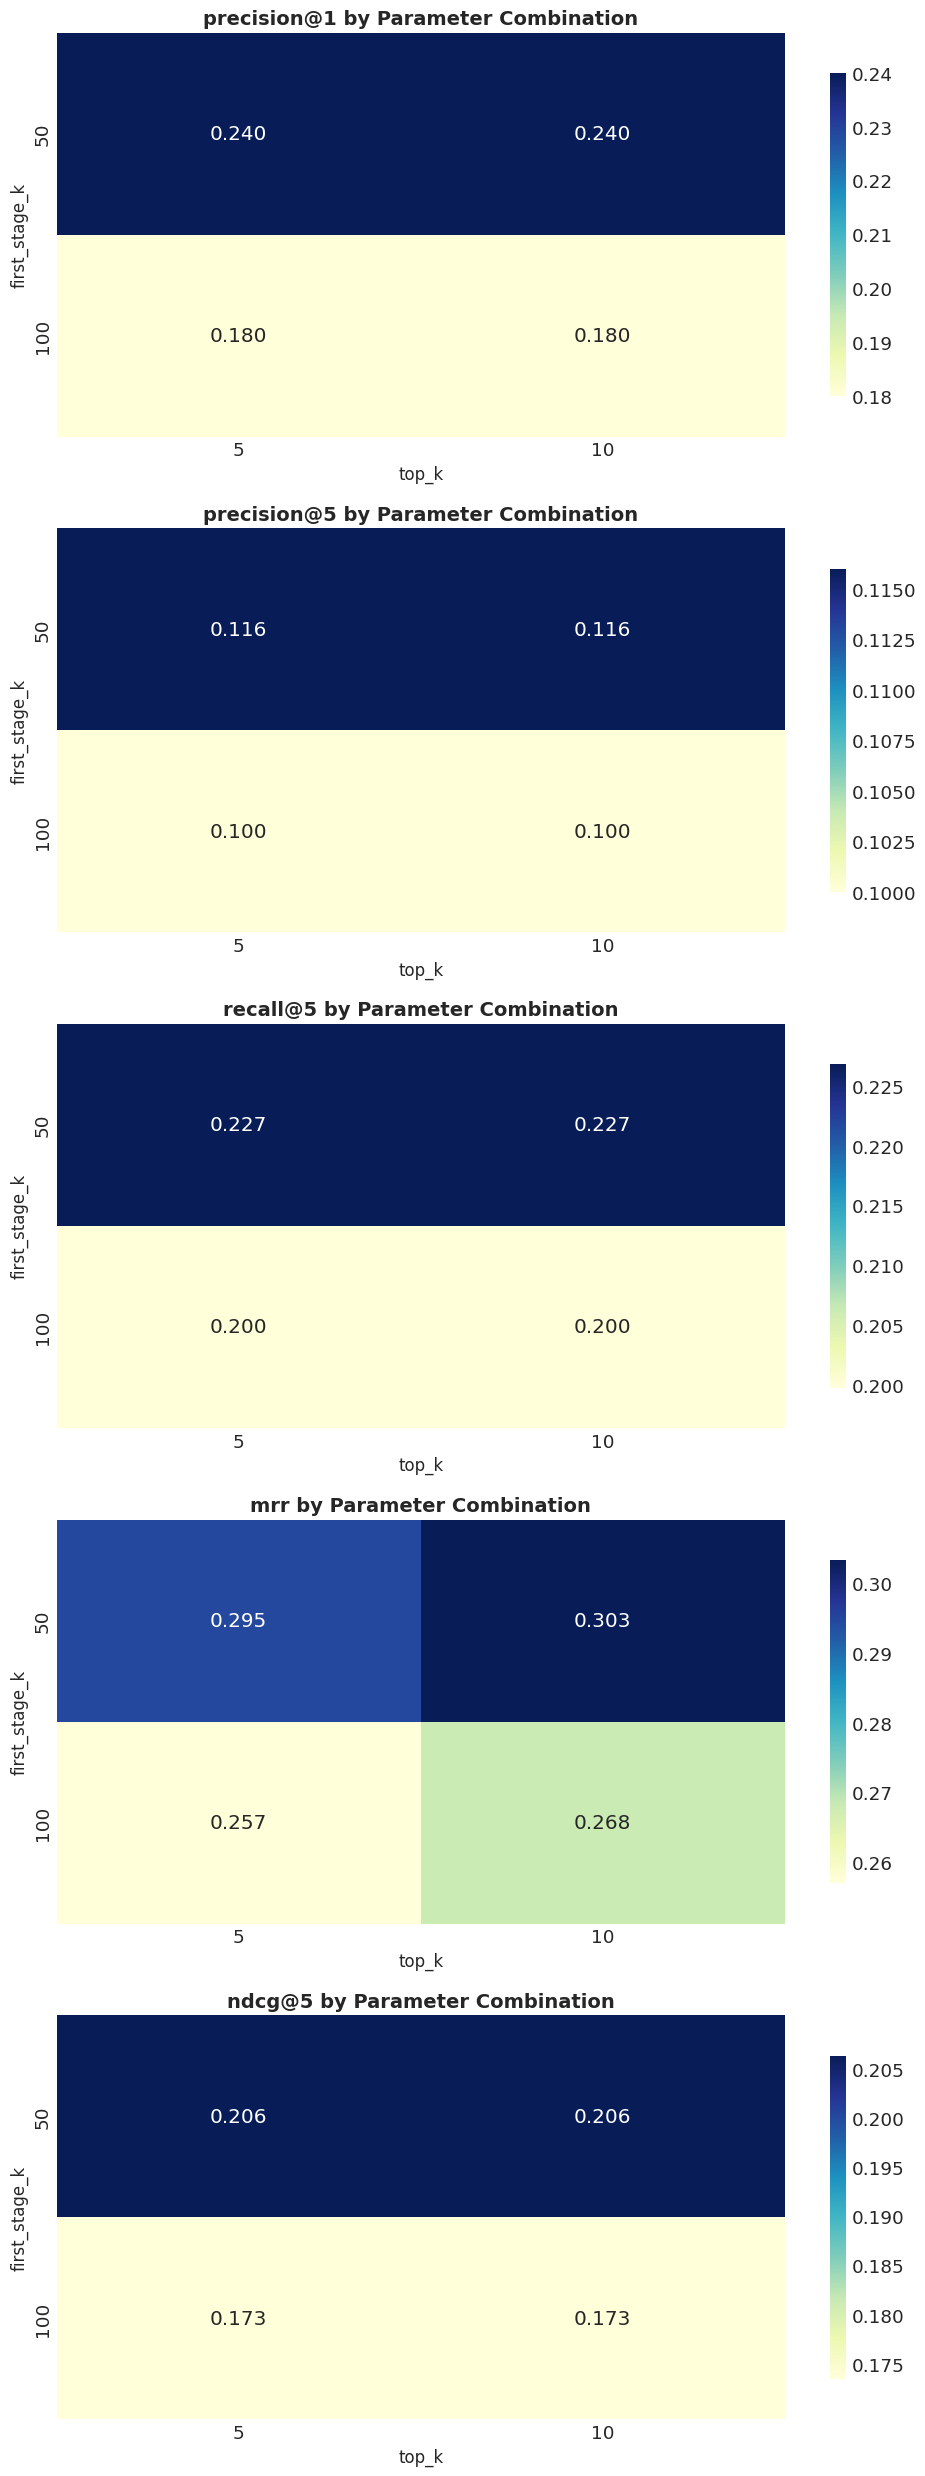

Heatmaps saved to /content/drive/MyDrive/legal-rag-assistant/Notebooks/tuning/cascade/cascade_heatmaps_20250507_182752.png


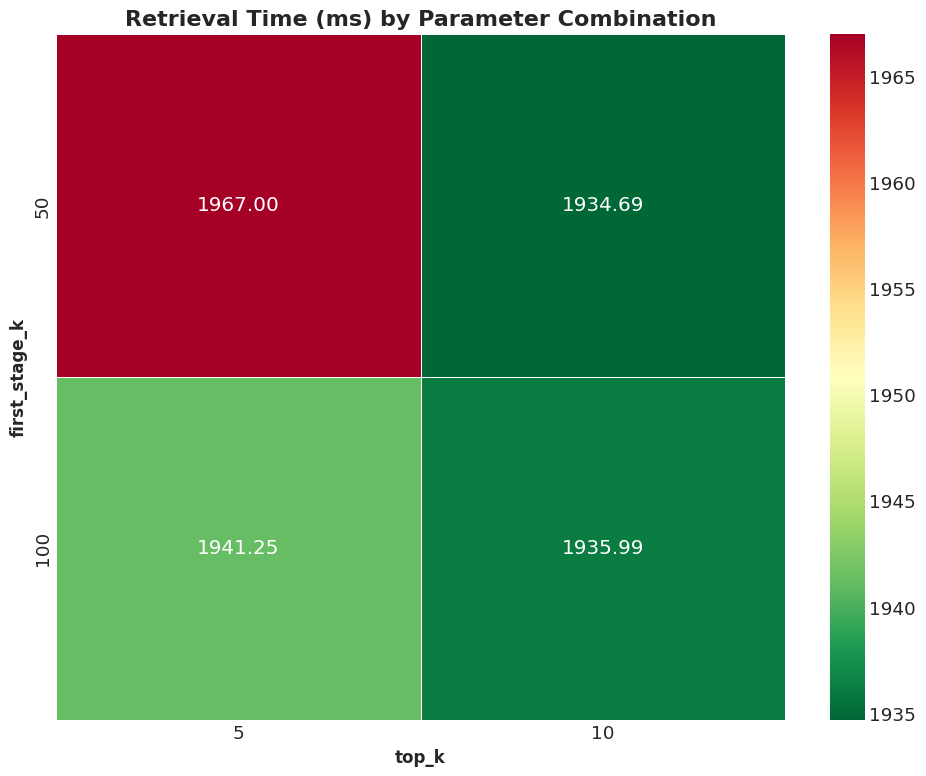

Time heatmap saved to /content/drive/MyDrive/legal-rag-assistant/Notebooks/tuning/cascade/cascade_time_heatmap_20250507_182752.png


,model,first_stage_k,top_k,retrieve_time_ms
1,"Cascade (first_stage_k=50, top_k=10)",50,10,1934.69
3,"Cascade (first_stage_k=100, top_k=10)",100,10,1935.99
2,"Cascade (first_stage_k=100, top_k=5)",100,5,1941.25
0,"Cascade (first_stage_k=50, top_k=5)",50,5,1967.00


Best parameter combination based on MRR: first_stage_k=50, top_k=10
Fastest parameter combination: first_stage_k=50, top_k=10 (1934.69 ms)

Performance vs. Speed Tradeoff Analysis:
- Best performing config is 0.0% faster than the fastest config
- Best performing config has 0.0% worse MRR than the fastest config


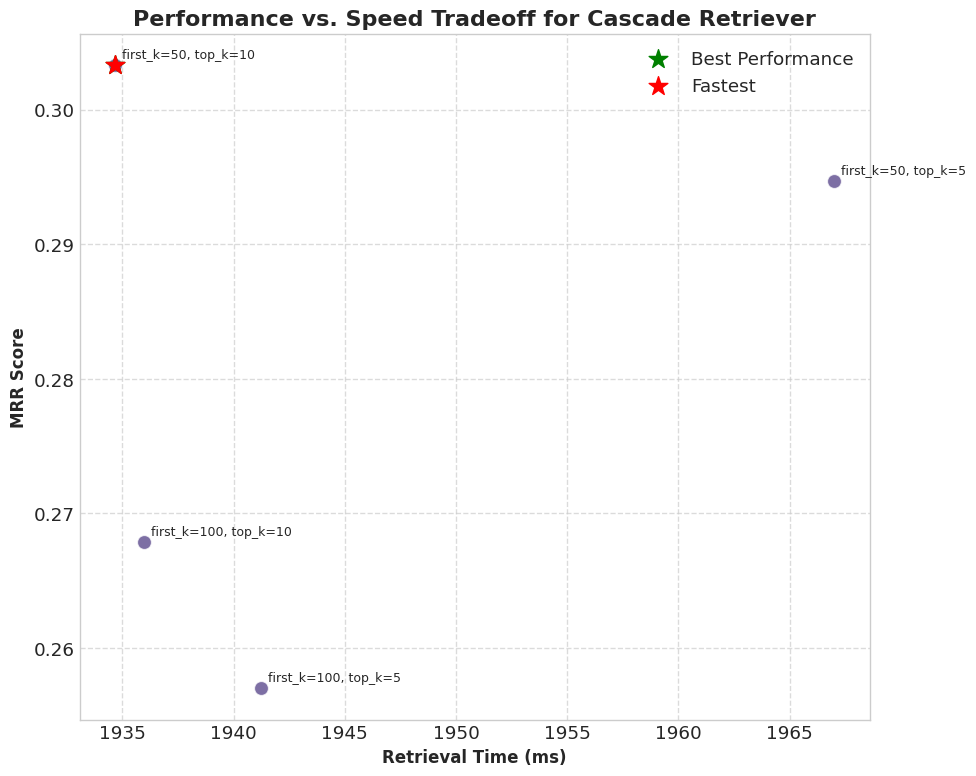

Tradeoff analysis plot saved to /content/drive/MyDrive/legal-rag-assistant/Notebooks/tuning/cascade/cascade_tradeoff_20250507_182752.png


In [49]:
# Import necessary dependencies
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import itertools

def tune_cascade_retriever(sparse_models, dense_models, data, corpus_data,
                           first_stage_k_values=[50, 100],
                           top_k_values=[5, 10],
                           output_dir="tuning"):
    """
    Tune the first_stage_k and top_k parameters for CascadeRetriever with retrieval time analysis.

    Args:
        sparse_models: Dictionary of sparse retrieval models
        dense_models: Dictionary of dense retrieval models
        data: The dataset containing questions and reference articles
        corpus_data: Dictionary containing corpus information
        first_stage_k_values: List of first_stage_k values to evaluate
        top_k_values: List of top_k values to evaluate
        output_dir: Directory to save results
    """
    # Create output directory
    os.makedirs(output_dir, exist_ok=True)
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

    # We'll use the best sparse model for first stage and dense model for second stage
    first_stage_model = sparse_models["bm25_plus"]
    second_stage_model = dense_models["dense"]

    # Store results for each parameter combination
    results = []

    # Generate all parameter combinations
    param_combinations = list(itertools.product(first_stage_k_values, top_k_values))

    # Evaluate each parameter combination
    for first_stage_k, top_k in param_combinations:
        print(f"Evaluating Cascade with first_stage_k={first_stage_k}, top_k={top_k}...")

        # Create cascade retriever with current parameters
        cascade_retriever = CascadeRetriever(
            first_stage_model,
            second_stage_model,
            corpus_data=corpus_data
        )

        # Use subset of dev set for faster tuning
        dev_subset = data["dev"][:50]  # Adjust size as needed for your computational resources

        # Evaluate cascade retriever with custom parameters
        def evaluate_cascade(cascade_retriever, questions, article_lookup, top_k=top_k, first_stage_k=first_stage_k):
            """Custom evaluation for cascade retriever with specific parameters."""
            results = {
                "precision@1": [],
                "precision@5": [],
                "recall@5": [],
                "mrr": [],
                "ndcg@5": [],
                "time": []
            }

            for question in tqdm(questions, desc=f"Cascade: first_k={first_stage_k}, top_k={top_k}", leave=False):
                query = question["question"]
                relevant_ids = question["article_ids"]

                # Measure retrieval time
                start_time = time.time()
                retrieved = cascade_retriever.retrieve(query, top_k=top_k, first_stage_k=first_stage_k)
                end_time = time.time()

                # Extract just the document IDs
                retrieved_ids = [doc_id for doc_id, _ in retrieved]

                # Calculate metrics
                results["precision@1"].append(calculate_precision_at_k(retrieved_ids, relevant_ids, k=1))
                results["precision@5"].append(calculate_precision_at_k(retrieved_ids, relevant_ids, k=min(5, top_k)))
                results["recall@5"].append(calculate_recall_at_k(retrieved_ids, relevant_ids, k=min(5, top_k)))
                results["mrr"].append(calculate_mrr(retrieved_ids, relevant_ids))
                results["ndcg@5"].append(calculate_ndcg(retrieved_ids, relevant_ids, k=min(5, top_k)))
                results["time"].append(end_time - start_time)

            # Calculate average metrics
            avg_results = {metric: np.mean(values) for metric, values in results.items()}
            return avg_results

        cascade_results = evaluate_cascade(cascade_retriever, dev_subset, corpus_data['article_lookup'])

        # Store results with parameter values
        cascade_results["first_stage_k"] = first_stage_k
        cascade_results["top_k"] = top_k
        cascade_results["model"] = f"Cascade (first_stage_k={first_stage_k}, top_k={top_k})"
        cascade_results["retrieve_time_ms"] = cascade_results["time"] * 1000
        results.append(cascade_results)

    # Convert to DataFrame
    results_df = pd.DataFrame(results)

    # Save results to CSV
    csv_path = f"{output_dir}/cascade_tuning_{timestamp}.csv"
    results_df.to_csv(csv_path, index=False)
    print(f"Results saved to {csv_path}")

    # Create heatmap visualization for each metric
    metrics_to_plot = ["precision@1", "precision@5", "recall@5", "mrr", "ndcg@5"]

    fig, axes = plt.subplots(len(metrics_to_plot), 1, figsize=(10, len(metrics_to_plot) * 5))

    for i, metric in enumerate(metrics_to_plot):
        # Pivot data for heatmap
        pivot_data = results_df.pivot(index="first_stage_k", columns="top_k", values=metric)

        # Create heatmap
        ax = axes[i]
        sns.heatmap(pivot_data, annot=True, fmt=".3f", cmap="YlGnBu", ax=ax, cbar_kws={"shrink": 0.8})
        ax.set_title(f"{metric} by Parameter Combination", fontsize=14, fontweight="bold")
        ax.set_xlabel("top_k", fontsize=12)
        ax.set_ylabel("first_stage_k", fontsize=12)

    plt.tight_layout()
    heatmap_path = f"{output_dir}/cascade_heatmaps_{timestamp}.png"
    plt.savefig(heatmap_path, dpi=300, bbox_inches="tight")
    plt.show()
    print(f"Heatmaps saved to {heatmap_path}")

    # NEW: Create retrieval time heatmap
    plt.figure(figsize=(10, 8))
    time_pivot = results_df.pivot(index="first_stage_k", columns="top_k", values="retrieve_time_ms")
    sns.heatmap(time_pivot, annot=True, fmt=".2f", cmap="RdYlGn_r", linewidths=.5)
    plt.title("Retrieval Time (ms) by Parameter Combination", fontsize=16, fontweight="bold")
    plt.xlabel("top_k", fontsize=12, fontweight="bold")
    plt.ylabel("first_stage_k", fontsize=12, fontweight="bold")
    time_heatmap_path = f"{output_dir}/cascade_time_heatmap_{timestamp}.png"
    plt.tight_layout()
    plt.savefig(time_heatmap_path, dpi=300)
    plt.show()
    print(f"Time heatmap saved to {time_heatmap_path}")

    # NEW: Create a summary table of all parameter combinations with time
    time_df = results_df[["model", "first_stage_k", "top_k", "retrieve_time_ms"]].copy()
    time_df = time_df.sort_values("retrieve_time_ms")
    time_df["retrieve_time_ms"] = time_df["retrieve_time_ms"].round(2)
    display(time_df)

    # Find optimal parameter combination based on MRR metric
    best_idx = results_df["mrr"].idxmax()
    best_params = {
        "first_stage_k": results_df.loc[best_idx, "first_stage_k"],
        "top_k": results_df.loc[best_idx, "top_k"],
        "mrr": results_df.loc[best_idx, "mrr"]
    }
    print(f"Best parameter combination based on MRR: first_stage_k={best_params['first_stage_k']}, top_k={best_params['top_k']}")

    # NEW: Find fastest parameter combination
    fastest_idx = results_df["retrieve_time_ms"].idxmin()
    fastest_params = {
        "first_stage_k": results_df.loc[fastest_idx, "first_stage_k"],
        "top_k": results_df.loc[fastest_idx, "top_k"],
        "time_ms": results_df.loc[fastest_idx, "retrieve_time_ms"]
    }
    print(f"Fastest parameter combination: first_stage_k={fastest_params['first_stage_k']}, top_k={fastest_params['top_k']} ({fastest_params['time_ms']:.2f} ms)")

    # NEW: Compare time vs. performance tradeoff
    best_time = results_df.loc[best_idx, "retrieve_time_ms"]
    fastest_mrr = results_df.loc[fastest_idx, "mrr"]

    time_diff_pct = ((best_time - fastest_params["time_ms"]) / fastest_params["time_ms"]) * 100
    mrr_diff_pct = ((best_params["mrr"] - fastest_mrr) / fastest_mrr) * 100

    print(f"\nPerformance vs. Speed Tradeoff Analysis:")
    print(f"- Best performing config is {time_diff_pct:.1f}% {'slower' if time_diff_pct > 0 else 'faster'} than the fastest config")
    print(f"- Best performing config has {mrr_diff_pct:.1f}% {'better' if mrr_diff_pct > 0 else 'worse'} MRR than the fastest config")

    # NEW: Create a scatter plot showing the performance-speed tradeoff
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x="retrieve_time_ms",
        y="mrr",
        data=results_df,
        s=100,
        alpha=0.7
    )

    # Annotate points with parameter combinations
    for idx, row in results_df.iterrows():
        plt.annotate(
            f"first_k={int(row['first_stage_k'])}, top_k={int(row['top_k'])}",
            xy=(row["retrieve_time_ms"], row["mrr"]),
            xytext=(5, 5),
            textcoords="offset points",
            fontsize=9
        )

    # Highlight best performance and fastest configurations
    plt.scatter(
        x=best_time,
        y=best_params["mrr"],
        s=200,
        color='green',
        marker='*',
        label="Best Performance"
    )

    plt.scatter(
        x=fastest_params["time_ms"],
        y=fastest_mrr,
        s=200,
        color='red',
        marker='*',
        label="Fastest"
    )

    plt.title("Performance vs. Speed Tradeoff for Cascade Retriever", fontsize=16, fontweight="bold")
    plt.xlabel("Retrieval Time (ms)", fontsize=12, fontweight="bold")
    plt.ylabel("MRR Score", fontsize=12, fontweight="bold")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()

    tradeoff_path = f"{output_dir}/cascade_tradeoff_{timestamp}.png"
    plt.tight_layout()
    plt.savefig(tradeoff_path, dpi=300)
    plt.show()
    print(f"Tradeoff analysis plot saved to {tradeoff_path}")

    return {
        "results_df": results_df,
        "best_params": best_params,
        "fastest_params": fastest_params  # NEW: return fastest configuration
    }

# Create tuning directory if it doesn't exist
if not os.path.exists('/content/drive/MyDrive/legal-rag-assistant/Notebooks/tuning/cascade'):
    os.makedirs('/content/drive/MyDrive/legal-rag-assistant/Notebooks/tuning/cascade')

# Tune Cascade Retriever parameters
cascade_tuning_results = tune_cascade_retriever(
    sparse_models,
    dense_models,
    data,
    corpus_data,
    first_stage_k_values=[50, 100],
    top_k_values=[5, 10],
    output_dir="/content/drive/MyDrive/legal-rag-assistant/Notebooks/tuning/cascade"
)

# Create the best Cascade Retriever with optimized parameters
best_first_stage_k = cascade_tuning_results["best_params"]["first_stage_k"]
best_top_k = cascade_tuning_results["best_params"]["top_k"]


In [50]:
best_cascade_retriever = CascadeRetriever(
    sparse_models["bm25_plus"],
    dense_models["dense"],
    corpus_data=corpus_data
)

print(f"\nCreated optimized CascadeRetriever with first_stage_k={best_first_stage_k}, top_k={best_top_k}")


Created optimized CascadeRetriever with first_stage_k=50, top_k=10


### 5.4 Query-Dependent Routing

In [51]:
class QueryRoutingRetriever:
    """Routes queries to the best retriever based on query characteristics."""

    def __init__(self, sparse_retriever, dense_retriever):
        """
        Args:
            sparse_retriever: Retriever for keyword-focused queries
            dense_retriever: Retriever for semantic/conceptual queries
        """
        self.sparse_retriever = sparse_retriever
        self.dense_retriever = dense_retriever
        self.name = f"QueryRouter({sparse_retriever.__class__.__name__}⟷{dense_retriever.__class__.__name__})"

        # For French legal text, we'll need these:
        self.legal_keywords = [
            "article", "loi", "code", "décret", "règlement", "directive",
            "jurisprudence", "tribunal", "cour", "justice", "légal", "droit",
            "juridique", "procédure", "contrat", "obligation"
        ]

    def analyze_query(self, query):
        """Analyze query to determine which retriever would be more effective."""
        # Count legal keywords
        query_lower = query.lower()
        keyword_count = sum(1 for keyword in self.legal_keywords if keyword in query_lower)

        # Check query length (tokens)
        query_length = len(query.split())

        # Check if query contains specific article references
        has_article_ref = any(ref in query_lower for ref in ["article", "art.", "§"])

        # Determine retriever based on query characteristics
        if has_article_ref or keyword_count >= 2 or query_length <= 5:
            return "sparse"  # More likely to be a keyword/reference query
        else:
            return "dense"   # More likely to be a conceptual question

    def retrieve(self, query, top_k=5):
        """Route query to appropriate retriever based on characteristics."""
        retriever_type = self.analyze_query(query)

        if retriever_type == "sparse":
            return self.sparse_retriever.retrieve(query, top_k=top_k)
        else:
            return self.dense_retriever.retrieve(query, top_k=top_k)

In [53]:
query_router_retriever = QueryRoutingRetriever(
    sparse_models["bm25_plus"],
    dense_models["dense"]
)

### 5.5 Ensemble Method with Voting

In [52]:
class EnsembleVotingRetriever:
    """Ensemble retrieval with voting to prioritize docs that appear in multiple result sets."""

    def __init__(self, retrievers, weights=None):
        """
        Args:
            retrievers: List of retriever models
            weights: Optional list of weights for each retriever (default: equal weights)
        """
        self.retrievers = retrievers
        self.weights = weights if weights else [1.0] * len(retrievers)
        self.name = f"Ensemble({'+'.join(r.__class__.__name__ for r in retrievers)})"

    def retrieve(self, query, top_k=5, per_retriever_k=30):
        """Retrieve documents using voting ensemble approach."""
        # Get results from all retrievers
        all_results = []
        for retriever in self.retrievers:
            results = retriever.retrieve(query, top_k=per_retriever_k)
            all_results.append(results)

        # Count document occurrences across result sets with weighting
        doc_scores = {}
        for i, result_set in enumerate(all_results):
            weight = self.weights[i]
            for rank, (doc_id, score) in enumerate(result_set):
                if doc_id not in doc_scores:
                    doc_scores[doc_id] = 0
                # Add weighted vote (higher ranks get higher votes)
                doc_scores[doc_id] += weight * (1.0 - (rank / len(result_set)))

        # Sort by vote count and return top-k
        sorted_results = sorted(doc_scores.items(), key=lambda x: x[1], reverse=True)
        return sorted_results[:top_k]

In [54]:
ensemble_voting_retriever = EnsembleVotingRetriever(
    retrievers=[sparse_models["bm25_plus"], dense_models["dense"]],
    weights=[0.6, 0.4]  # Slightly favoring BM25 based on our baseline results
)

## 6. Benchmarking All Hybrid Strategies

In [55]:
# Collect all hybrid retrievers in a dictionary
hybrid_retrievers = {
    "Linear Hybrid": best_linear_retriever,
    "RRF": best_rrf_retriever,
    "Cascade": best_cascade_retriever,
    "Query Router": query_router_retriever,
    "Ensemble Voting": ensemble_voting_retriever
}

#### 6.1 Benchmark all hybrid strategies and compare with the baselines

Starting comprehensive benchmarking of all retrieval methods...


Benchmarking progress:   0%|          | 0/5 [00:00<?, ?it/s]


Evaluating Linear Hybrid retriever...


Evaluating LinearHybridRetriever:   0%|          | 0/100 [00:00<?, ?it/s]


Evaluating RRF retriever...


Evaluating ReciprocalRankFusionRetriever:   0%|          | 0/100 [00:00<?, ?it/s]


Evaluating Cascade retriever...


Evaluating CascadeRetriever:   0%|          | 0/100 [00:00<?, ?it/s]


Evaluating Query Router retriever...


Evaluating QueryRoutingRetriever:   0%|          | 0/100 [00:00<?, ?it/s]


Evaluating Ensemble Voting retriever...


Evaluating EnsembleVotingRetriever:   0%|          | 0/100 [00:00<?, ?it/s]

Results saved to /content/drive/MyDrive/Notebooks/results/benchmark/hybrid_comparison_20250507_184038.csv


<Figure size 1600x1000 with 0 Axes>

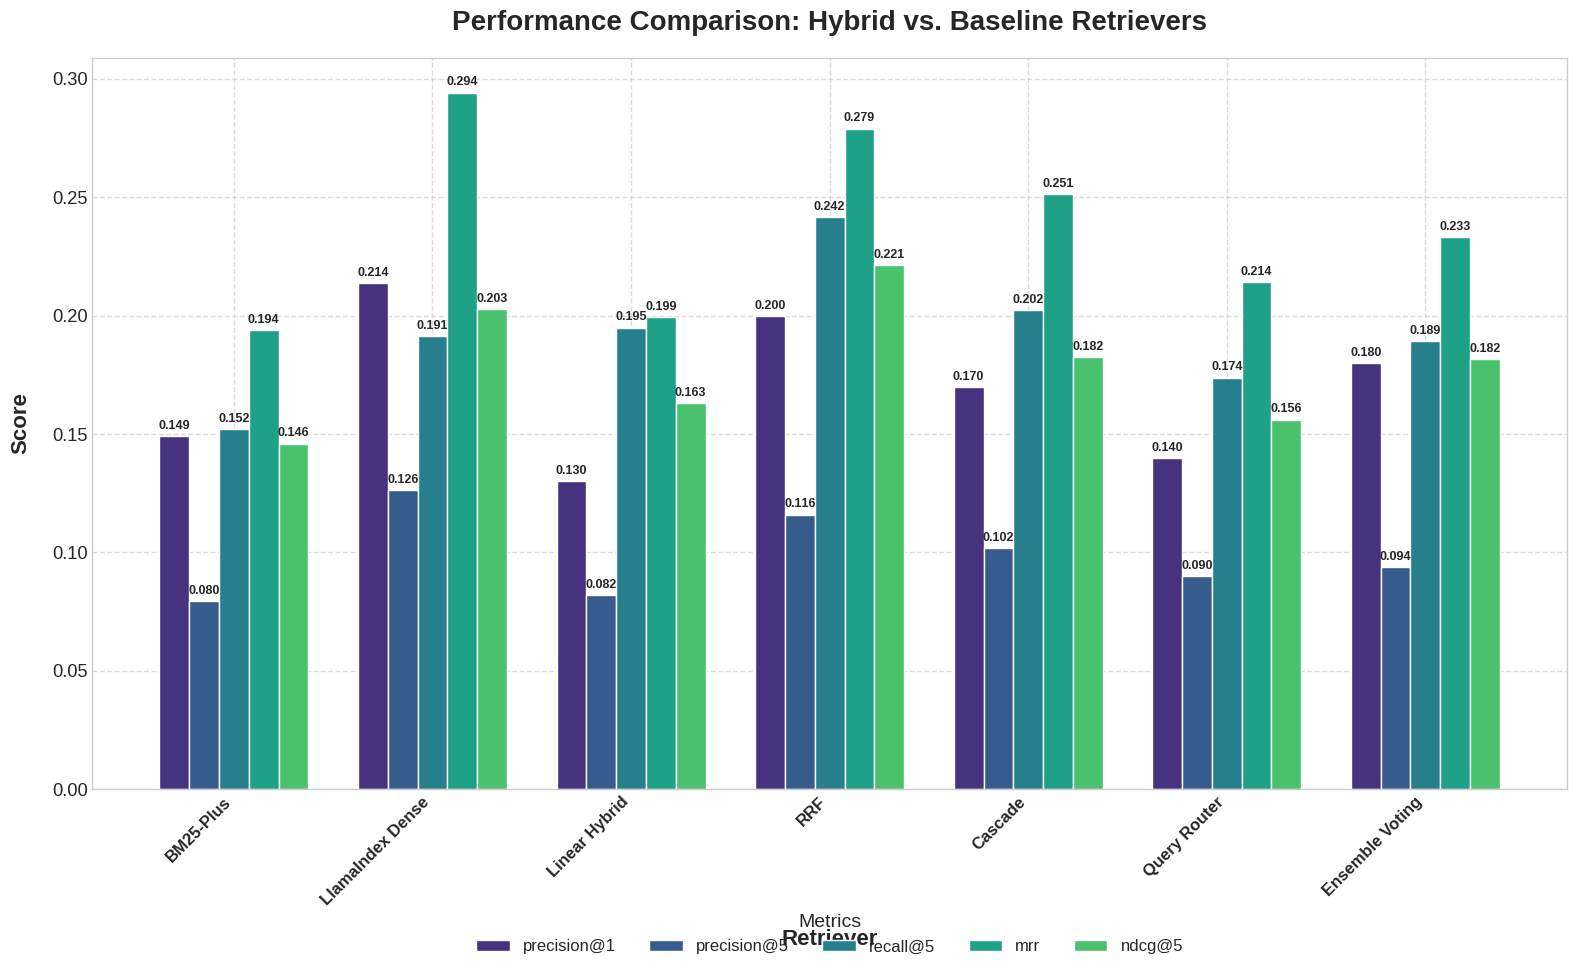

Performance plot saved to /content/drive/MyDrive/Notebooks/results/benchmark/hybrid_performance_20250507_184038.png


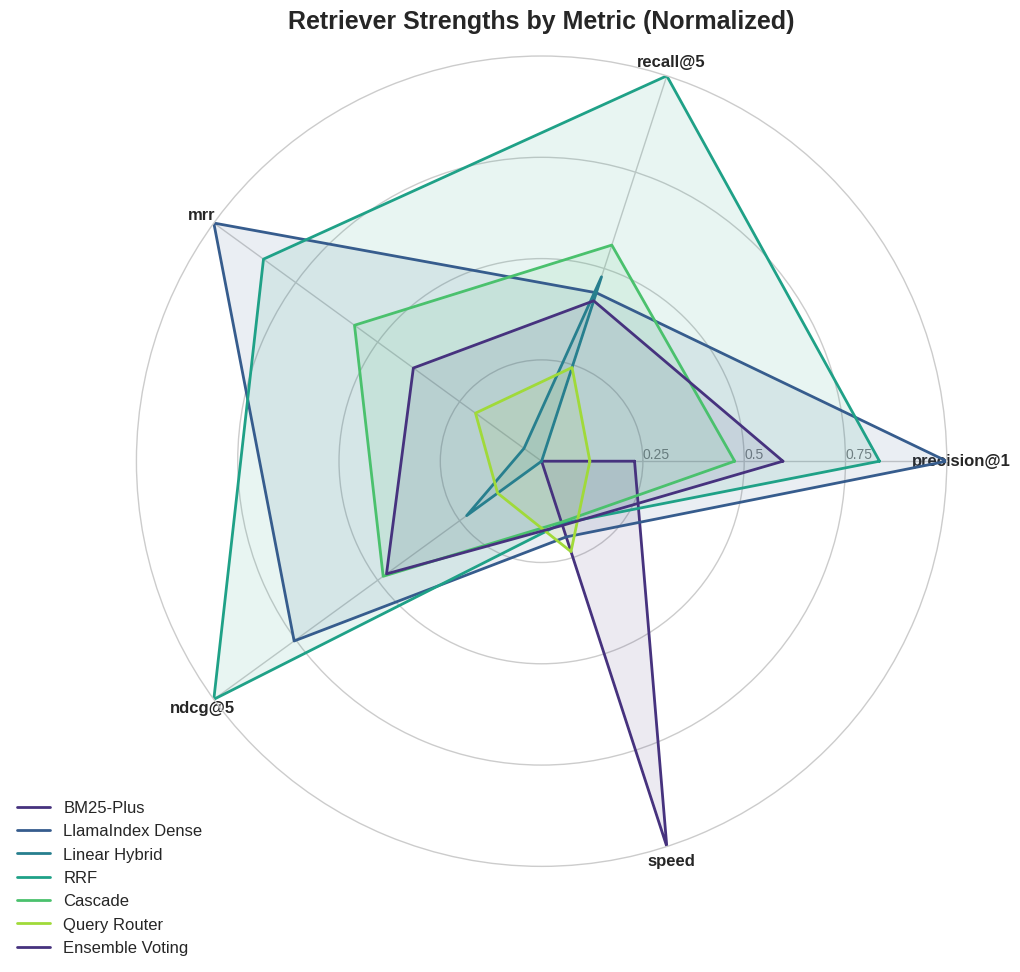

Radar chart saved to /content/drive/MyDrive/Notebooks/results/benchmark/hybrid_radar_20250507_184038.png


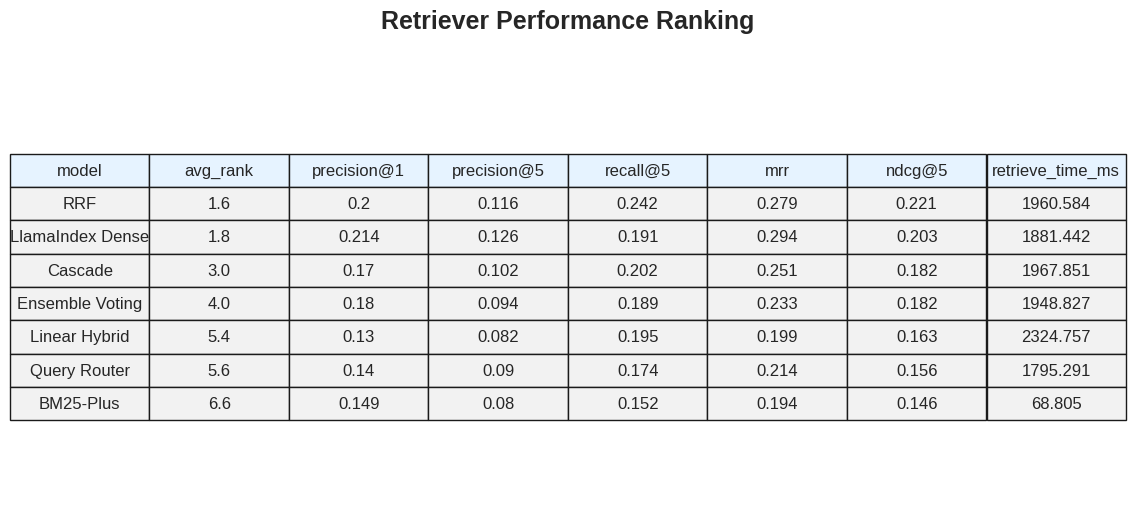

Summary table saved to /content/drive/MyDrive/Notebooks/results/benchmark/hybrid_summary_20250507_184038.png

✨ KEY FINDINGS:
🥇 Best overall retriever: RRF
📈 Highest recall@5: RRF (0.242)
⚡ Fastest retriever: BM25-Plus (68.81 ms)


In [56]:
def benchmark_hybrid_retrievers(hybrid_retrievers, baseline_results, data, corpus_data, output_dir="results"):
    """Benchmark all hybrid retrievers against baseline methods."""
    # Create output directory
    os.makedirs(output_dir, exist_ok=True)
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

    print("Starting comprehensive benchmarking of all retrieval methods...")

    # Prepare results list
    results = []

    # Setup progress tracking
    retrievers = list(hybrid_retrievers.items())
    overall_pbar = tqdm(total=len(retrievers), desc="Benchmarking progress")

    # Evaluate each hybrid retriever
    for model_name, retriever in retrievers:
        print(f"\nEvaluating {model_name} retriever...")

        # Use a smaller sample for faster results during development
        # For final results, use the full dev set: data["dev"]
        dev_sample = data["dev"][:100]  # Adjust sample size as needed

        # Evaluate the retriever
        hybrid_results = evaluate_model(retriever, dev_sample, corpus_data['article_lookup'])
        hybrid_results["model"] = model_name
        hybrid_results["retrieve_time_ms"] = hybrid_results["time"] * 1000  # Convert to ms
        results.append(hybrid_results)
        overall_pbar.update(1)

    overall_pbar.close()

    # Convert hybrid results to DataFrame
    hybrid_df = pd.DataFrame(results)

    # Extract baseline results for comparison
    base_models = ["BM25-Plus", "LlamaIndex Dense"]
    baseline_df = baseline_results[baseline_results["model"].isin(base_models)].copy()

    # Combine baseline and hybrid results
    comparison_df = pd.concat([baseline_df, hybrid_df], ignore_index=True)

    # Save results to CSV
    csv_path = f"{output_dir}/hybrid_comparison_{timestamp}.csv"
    comparison_df.to_csv(csv_path, index=False)
    print(f"Results saved to {csv_path}")

    # Create performance comparison visualizations
    metrics_to_plot = ["precision@1", "precision@5", "recall@5", "mrr", "ndcg@5"]

    # 1. Create grouped bar chart for all metrics
    plt.figure(figsize=(16, 10))
    plt.style.use('seaborn-v0_8-whitegrid')

    x = np.arange(len(comparison_df["model"]))
    width = 0.15
    multiplier = 0

    fig, ax = plt.subplots(figsize=(16, 10))

    for metric in metrics_to_plot:
        offset = width * multiplier
        rects = ax.bar(x + offset, comparison_df[metric], width, label=metric)

        # Add value labels
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.3f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=9, fontweight='bold')
        multiplier += 1

    ax.set_title('Performance Comparison: Hybrid vs. Baseline Retrievers', fontsize=20, fontweight='bold', pad=20)
    ax.set_xlabel('Retriever', fontsize=16, fontweight='bold', labelpad=15)
    ax.set_ylabel('Score', fontsize=16, fontweight='bold', labelpad=15)
    ax.set_xticks(x + width * 2)
    ax.set_xticklabels(comparison_df["model"], fontsize=12, fontweight='bold', rotation=45, ha='right')
    ax.legend(title='Metrics', title_fontsize=14, fontsize=12,
              loc='upper center', bbox_to_anchor=(0.5, -0.15),
              fancybox=True, shadow=True, ncol=5)
    ax.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    metrics_plot_path = f"{output_dir}/hybrid_performance_{timestamp}.png"
    plt.savefig(metrics_plot_path, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Performance plot saved to {metrics_plot_path}")

    # 2. Create radar chart to show relative strengths of each method
    # Normalize metrics to compare relative strengths
    radar_metrics = ["precision@1", "recall@5", "mrr", "ndcg@5", "speed"]

    # Add speed metric (inverse of time)
    max_time = comparison_df["time"].max()
    comparison_df["speed"] = 1 - (comparison_df["time"] / max_time)  # Higher is better

    # Normalize metrics to 0-1 range for radar chart
    radar_df = comparison_df.copy()
    for metric in radar_metrics:
        min_val = radar_df[metric].min()
        max_val = radar_df[metric].max()
        if max_val > min_val:
            radar_df[metric] = (radar_df[metric] - min_val) / (max_val - min_val)

    # Create radar chart
    fig = plt.figure(figsize=(12, 10))

    # Number of variables
    categories = radar_metrics
    N = len(categories)

    # Create angle for each variable
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Close the loop

    # Create subplot with polar projection
    ax = plt.subplot(111, polar=True)

    # Draw one axis per variable and add labels
    plt.xticks(angles[:-1], categories, size=12, fontweight='bold')

    # Draw ylabels (0-1 range)
    ax.set_rlabel_position(0)
    plt.yticks([0.25, 0.5, 0.75], ["0.25", "0.5", "0.75"], size=10, color="grey")
    plt.ylim(0, 1)

    # Plot each retriever
    for i, row in radar_df.iterrows():
        model_name = row['model']
        values = row[radar_metrics].values.flatten().tolist()
        values += values[:1]  # Close the loop

        # Plot values
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=model_name)
        ax.fill(angles, values, alpha=0.1)

    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), fontsize=12)
    plt.title('Retriever Strengths by Metric (Normalized)', fontsize=18, fontweight='bold', pad=20)

    radar_path = f"{output_dir}/hybrid_radar_{timestamp}.png"
    plt.tight_layout()
    plt.savefig(radar_path, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Radar chart saved to {radar_path}")

    # 3. Create summary table with ranking
    # Calculate rank for each metric
    rank_df = comparison_df.copy()
    for metric in metrics_to_plot:
        rank_df[f"{metric}_rank"] = comparison_df[metric].rank(ascending=False)

    # Calculate average rank
    rank_cols = [f"{metric}_rank" for metric in metrics_to_plot]
    rank_df["avg_rank"] = rank_df[rank_cols].mean(axis=1)
    rank_df = rank_df.sort_values("avg_rank")

    # Create a readable summary table
    summary_df = rank_df[["model", "avg_rank"] + metrics_to_plot + ["retrieve_time_ms"]].copy()
    summary_df["avg_rank"] = summary_df["avg_rank"].round(2)

    # Round metrics for display
    for col in metrics_to_plot + ["retrieve_time_ms"]:
        summary_df[col] = summary_df[col].round(3)

    # Format as table
    plt.figure(figsize=(12, 6))
    ax = plt.subplot(111, frame_on=False)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

    table = plt.table(
        cellText=summary_df.values,
        colLabels=summary_df.columns,
        cellLoc='center',
        loc='center',
        cellColours=[['#f2f2f2']*len(summary_df.columns)]*len(summary_df),
        colColours=['#e6f3ff']*len(summary_df.columns),
    )

    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 2)

    plt.title("Retriever Performance Ranking", fontsize=18, fontweight='bold', pad=20)

    summary_path = f"{output_dir}/hybrid_summary_{timestamp}.png"
    plt.savefig(summary_path, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Summary table saved to {summary_path}")

    # Print key findings
    best_model = rank_df.iloc[0]["model"]
    best_metric = metrics_to_plot[0]
    for metric in metrics_to_plot:
        best_idx = comparison_df[metric].idxmax()
        if comparison_df.loc[best_idx, "model"] == best_model:
            best_metric = metric
            break

    print(f"\n✨ KEY FINDINGS:")
    print(f"🥇 Best overall retriever: {best_model}")
    print(f"📈 Highest {best_metric}: {comparison_df.loc[comparison_df[best_metric].idxmax(), 'model']} ({comparison_df[best_metric].max():.3f})")
    print(f"⚡ Fastest retriever: {comparison_df.loc[comparison_df['retrieve_time_ms'].idxmin(), 'model']} ({comparison_df['retrieve_time_ms'].min():.2f} ms)")

    return {
        "comparison_df": comparison_df,
        "rank_df": rank_df,
        "best_model": best_model
    }

# Create results directory if it doesn't exist
if not os.path.exists('/content/drive/MyDrive/legal-rag-assistant/Notebooks/results/benchmark'):
    os.makedirs('/content/drive/MyDrive/legal-rag-assistant/Notebooks/results/benchmark')

# Run the comprehensive benchmark
benchmark_results = benchmark_hybrid_retrievers(
    hybrid_retrievers,
    baseline_results,
    data,
    corpus_data,
    output_dir="/content/drive/MyDrive/legal-rag-assistant/Notebooks/results/benchmark"
)